            uint roomint;
            if (luint. TryParse(roomBox. Text, out roomint))
            {
                form1.Msg("Номер комнаты должен быть числом. Исправьте.");
                roomBox.Focus();
                return;
            }
            // Сравниваем даты.
            if (dateTimePicker1.Value > dateTimePicker2.Value)
            {
                form1.Msg("Дата приезда не может быть позже даты отъезда.");
                return;
            }

            // Добавим в список новый объект.
            Form1.list.Add(
                new Client(
                    nameBox.Text
                    , roomint
                    ,dateTimePicker1.Value
                    , dateTimePicker2.Value
                    , checkBoxVIP.Checked
                )
            );
            MessageBox.Show("Клиент" + nameBox.Text + " добавлен.");
            add = true;
        }

        private void b_Clear_Click(object sender, EventArgs e)
        {
            nameBox.Text = "";
            roomBox.Text = "";
            checkBoxVIP.Checked = false;
            nameBox.Focus();
        }
        private void b_Close_Click(object sender, EventArgs e)
        {
            if (add) // Если в список был добавлен хотя бы один объект.
            {
                form1.clientBindingSource.ResetBindinas(falce);
                form1.clientBindingSource.ResetBindings(false);
                form1. InitFreeCells);
                // Вычисляем свободный столбец
            }
            Close();
        }
    }
Страница 101

-------

Обратите внимание: код, используемый для добавления нового объекта в форме `FormAdd`, значительно короче и проще кода выполнящего эту задачу в главной форме при использовании интерфейса таблицы. Для ускоренного создания формы `FormEdit` используем класс `FormAdd`. Скопируем код из файла `FormAdd.cs` в файл `FormEdit.cs` и из файла `FormAdd.Designer.cs` в файл `FormEdit.Designer.cs`. Этим мы сократим объем работы. Удалим среднюю кнопку и именим текст оставшихся кнопок по примеру рис. 2.19. Переиме нуем обработчики: `b_Add_Click` на `b_Edit_Click`, a `FormAdd_Load` на `FormEdit_Load`.

    Добавление клиента _ O X
    Фамилия: Сидоров
    Nº комнаты: 201
    Дата заезда: 15.июня.2018
    Дата выезда: 30.июня.2018
    VIP персона: [X]
    Btn: Принять изменения Btn: Выход с отменой изменений
Рис. 2.19. Форма для изменения текущей записи

Страница 102

-------

__В седьмых__. Далее выполним следующие изменения. Нам потребуется в форме `FormEdit` получить индекс текущей строки и вычислить свободную ячейку текущей записи, поэтому изменим в главной форме уровень видимости таблицы на `public`, чтобы таблицу было видно в форме `FormEdit`.
__В восьмых__. Отредактируем класс `FormEdit` следующий образом:

    public partial class FormEdit : Form
    {
        public Formi form1; // Ссылка на главную форму.
        int i; // Индекс текущей записи.
        public FormEdit() { InitializeComponent(); }
        // Заполним поля формы значениями из текущей записи.
        private void FormEdit_Load(object sender, EventArgs e)
        {
            i = form1.dataGridView1.CurrentRow.Index;
            // Индекс текущей записи
            nameBox.Text = Form1.list[i].Name;
            roomBox.Text = Form1.list[i].Room.ToString();
            checkBoxVIP.Checked = Form1.list[i].VIP;
            dateTimePicker1.Value = Form1.list[i].Date1;
            dateTimePicker2.Value = Form1.list[i].Date2;
        }

        private void b_Edit_Click(object sender, EventArgs e)
        {
            // Проверяем поле Фамилия.
            if (string.IsNullOrEmpty(nameBox.Text))
            {
                form1.Msg ("Не введена фамилия. Введите.");
                nameBox.Focus();
                return;
            }
            // Проверяем поле Nº комнаты (rооm).
            if (string.IsNullOrEmpty(roomBox.Text))
            {
                form1.Msg("Не задан номер комнаты. Введите.");
                roomBox.Focus();
                return;
            }
Страница 103

----------

            uint roomInt;
            if (!uint.TryParse(roomBox.Text, out roomint))
            {
                form1.Msg("Номер комнаты должен быть числом. Исправьте.");
                roomBox.Focus();
                return;
            }
            // Сравниваем даты.
            if (dateTimePicker1.Value > dateTimePicker2.Value)
            {
                form1.Msg("Дата приезда не может быть позже даты отъезда.
                return;
            }
Страница 104

---------

            // Изменим свойства текущего объекта.
            Form1.list[i].Name = nameBox.Text;
            Form1.list[i].Room = roomInt;
            Form1.list[i].VIP = checkBoxVIP.Checked;
            Form1.list[i].Date1 = dateTimePicker1.Value;
            Form1.list[i].Date2 = dateTimePicker2.Value;
            // Обновим отображение записи.
            form1.clientBindingSource.ResetItem(i);
            // Вычислим свободную ячейку.
            TimeSpan days = dateTimePicker2.Value - dateTimePicker1.Value;
            form1.dataGridView1["days",", i]. Value = (days.Days + 1). ToString();
            Close();
        }
        private void b_Close_Click(object sender, EventArgs e)
        {
            Close();
        }
    }

__В девятых__. В обработчике `b_Del_Click` необходимо определить, что удаляет пользователь - группу выбранных строк или текущую строку. Если группа строк выделена через свои заголовки, то будет предложено удалить эту группу. Если выделена одна строка, одна ячейка или группа ячеек, то будет предложено удалить только текущую строку. __Приведем код обработчика__ `b_Del_Click`:

    private void b_Del_Click(object sender, EventArgs e)
    {
        if (dataGridView1.CurrentCell == null)
            return; // Если таблица пустая.
        if (dataGridView1.SelectedRows.Count > 1) // Если группа строк.
        {
            if(
                MessageBox.Show(
                    "Вы действительно хотите удалить ГРУППУ СТРОК?"
                    , "Внимание"
                    , MessageBoxButtons.YesNo
                    , MessageBoxIcon.Question) == DialogResult.Yes
            )
Страница 105

--------------

            {
                // Отберем из списка list выбранные строки.
                List<Client> listDel = new Leteelle
                // Отберем из списка list выбранные строки.
                List<Client> listDel = new List <Client>();

                foreach (DataGridViewRow item in dataGridView1.SelectedRows)
                    listDel.Add(list[item.Index]);
                // Удалим из списка list выбранные строки.
                foreach (Client item in listDel)
                    list.Remove(item);
                clientBindingSource.ResetBindings(false);
                return;
            }
            else { return; }
        }

        // Группы строк нет, есть одна текущая строка.
        string fam = (string)dataGridView1.CurrentRow.Cells["name"].Value;
        if (
            MessageBox.Show(
                "Вы действительно хотите удалить клиента "
                + fam
                + "?"
                , "Внимание"
                , MessageBoxButtons.YesNo
                , MessageBoxIcon.Question
            ) == DialogResult.No
        )
        { return; }
        list.RemoveAt(dataGridView1.CurrentRow.Index);
        clientBindingSource.ResetBindings(false);
    }
Страница 106

--------

Как видите, удаление группы строк — это более сложная задача по сравнению с удалением текущей строки. На этом мы закончили доработку приложения для программного выполнения таких операций, как добавление, изменение и удаление записей. __Как отменить добавление и изменение записей через интерфейс таблицы__. При разработке приложения для добавления новых записей и изменения существующих разработчик может __Во первых__, использовать только интерфейс таблицы; __Во вторых__, реализовать программное выполнение операций добавления и изменения записей; __В третьих__, использовать возможности 1 и 2 совместно. Можно ли во всех случаях использовать только стандартный интерфейс таблицы? Ответ: нет. Когда в таблице не все свойства источника данных отображаются (сложные типы), или разработчик не захотел отображать ряд столбцов, чтобы уменьшить размеры таблицы, то создать полноценную запись не удастся. Кроме того, не все ячейки можно будет изменить. Для решения таких задач возможно только программное манипулирование строками таблицы. Ранее мы отметили, что код программы с использованием отдельных форм для выполнения операций добавления и изменения получается короче, проще и надежнее. В этом случае для исключения ошибок следует заблокировать выполнение этих операций через интерфейс таблицы и реализовать выполнение этих операций в отдельных формах. Вместо форм можно использовать и вкладки. __Для блокирования добавления и изменения записей через интерфейс таблицы можно выполнить следующие настройки__:
- `AllowUserToAddRows=false` — убрать строку для добавления новой записи из таблицы.
- `ReadOnly=true` — запретить пользователю изменять ячейки непосредственно в таблице.

Как было отмечено, особых проблем с удалением записей клавишей `Delete` нет, но если Вы считаете, что лучше запретить эту операцию, то укажите в свойствах таблицы `AllowUserToDeleteRows = false`. Перечисленные свойства доступны также и в окне выбора настроек (см. рис. 2.6).

Страница 107

-------

# 2.12. Фильтрация строк таблицы
Для отображения строк, удовлетворяющих некоторому критерию, следует в цикле отобрать подходящие строки. Иногда из таких строк создают новую коллекцию, а затем выполняют привязку таблицы к этой коллекции. Это способ имеет ряд недостатков, главным из которых является то, что такие операции, как добакление и удаление строк (объектов) из таблицы `DataGridView`, привязанной к коллекции отобранных строк, базовый список не затрагивают. Поэтому надо либо отказываться от этих операций, либо выполнять актуализацию (выравнивание) базового списка, что является еще одной задачей. Следует также заметить, что номера строк отобранных записей в таблице не соответствуют номерам объектов в базовом списке. Ниже предлагается способ, лишенный этих недостатков. Способ основан на использовании свойства `Row. Visible`, позволяющего скрыть ненужные строки. Данный способ прямого отношения к источнику данных не имеет, он ориентирован на строки таблицы, поэтому может быть применим к любым таблицам. Преимущества способа состоят в том, что не нужно создавать вторую коллекцию отобранных строк. Вместо этого, строки таблицы, не удовлетворяющие условию отбора, не отображаются (`...Row.Visible=false`). __При этом все строки__ — отображаемые и неотображаемые - продолжают принадлежать таблице, и номера отобранных строк в процессе фильтрации остаются изначальными, поэтому добавление и удаление объектов осуществляется обычным образом. Есть одно небольшое ограничение в использовании свойсты `Visible`: нельзя делать невидимой строку с текущей ячейкой, поэтому в программе перед фильтрацией строк следует отменит выделение текущей ячейки с помощью оператова. Приведем пример фильтрации строк, доработав наше приложение. Добавим на главную форму текстовые строки и кнопки, используемые для отбора (см. рис. 2.20). Особенность используемого многокритериального способа отбора строк таблицы состоит в том, что используются только непустые элементы TextBox и по их значениям отбираются строки, которые одновременно удовлетворяют всем заданным критериям.

Страница 108

---------------

    Form1 _ O X
||Фамилия|№ комнаты|Даты заезда|Даты отьезда|VIP|Koл-во дней|
|---|---|---|---|---|---|---|
|&#9658;|Иванов|101|22.04.2018|22.05.2018|\[ \]|31|
||Николаев|103|12.05.2018|22.07.2018|\[ \]|72|
||Сидоров|201|15.06.2018|30.06.2018|\[ \]|16|
||Титов|202|13.07.2018|22.07.2018|\[X\]|10|
||Сергеев|205|19.08.2018|22.08.2018|\[ \]|4|
|&#129340;|---|---|---|---|\[ \]|---|

    Btn: Добавить Btn: Изменить Btn: Удалить
    Фамилия: ___
    № комнаты: ___
    Vip: [ ]
    Дата заезда: ___
    Дата отьезда: __
    Btn: Отобрать Btn: Очистить Btn: Показать всех

Рис. 2.20. Форма с критериями отбора записей

Страница 109

--------------

Создайте обработчики кнопок «Отобрать», «Очистить» и «Показать всех». Измените имена обработчиков на более понятное (см. в коде) и вставьте в них код из следующего фрагмента:
    
    // Отбор клиентов по совокупности критериев.
    private void b_Отобрать_Click(object sender, EventArgs e)
    {
        dataGridView1.CurrentCell = null;
        for (int i = 0; i < dataGridView1.Rows,Count - rowAdd; i++)
        {
            if (TestRow(i))
            { dataGridView1.Rows(I].Visible = true; }
            else
            { dataGridView1.Rows[i].Visible = false; }
        }
    }

    // Метод проверяет ячейки переданной строки
    // на одновременное равенство всем критериям.
    private bool TestRow(int i)
    {
        if(nameTextBox.Text != "" && list[i].Name != nameTextBox.Text) return false;
        if(roomTextBox.Text != "" && list[i].Room.ToString() != roomTextBox.Text) return false;
        if(date1TextBox.Text!= "" && list[i].Date1 != DateTime.Parse(date1TextBox.Text)) return false;
        if(date2TextBox.Text!= "" && list[i].Date2 != DateTime.Parse(date2TextBox, Text)) return false;
        if(VIPcheckBox.Checked && !list[i].VIP) return false;
        return true;
    }
Страница 110

----------------

    // Очистка критерись.
    private void b_ClearFilter _Click(object sender, EventArgs e)
    {
        nameTextBox.Text = "";
        roomTextBox.Text = "";
        date1TextBox.Text = "";
        date2TextBox.Text = "";
    }

    list.Sort(delegate (Client al, Client a2) { return al.Name.CompareTo(a2.Name); });


__Во вторых__. Используем лямбда-выражение:

    list.Sort((al, a2) => a1.Name.CompareTo(a2.Name));
Достоинством метода `Sort` является то, что сортировка выполняется на месте. Кроме того, если у значения, возвращаемого анонимным методом делегата, поменять знак, то сортировка будет выполняться по убыванию. Для выполнения сортировки как по возрастанию значений, так и по убыванию добавим два элемента `RadioButton` (см. рис. 2.21). Если будет задана сортировка по убыванию, то умножим возвращаемое методом делегата значение на -1.

    Табличное отображение данных _ O X
    Порядок сортировки: [X] по возрастанию [] по убыванио
||Фамилия|№ комнаты|Дата заезда|Дата Отъезда|VIP|Кол-во дней| 
|---|---|---|---|---|---|---| 
|&#9658;|Иванов|101|22.04.2018|22.05.2018|\[ \]|31| 
|...|...|...|...|...|...|...| 
    btn: Добавить
    btn: Изменить
    
Рис. 2.21. Фрагмент окна с переключателями порядка сортировки


Страница 111

----------

Щелчок заголовка столбца генерирует событие __ColumnHeaderMouseClick__. Создадим в нашем приложении обработчик этого события и вставим в него следующий код:

    private void dataGridView1_ColumnHeaderMouseClick(object sender, DataGridViewCellMouseEventArgs e)
    {
        if (dataGridView1.Rows.Count > rowAdd)
        {
            // Установим порядок сортировки.
            int d = radioButton1.Checked == true ? 1 : -1;
            switch (dataGridView1.Columns[e.ColumnIndex].Name)
            {
                case "name":
                list.Sort(delegate (Client a1, Client a2)
                    { return d * a1.Name.CompareTo(a2.Name); 7);
                break;
                case "room":
                list.Sort(delegate (Client a1, Client a2)
                    { return d * a1.Room.CompareTo(a2.Room); });
                break;
                case "date1":
                list.Sort(delegate (Client a1, Client a2)
                    { return d * a1.Date1.CompareTo(a2.Date1); });
                break;

                case "date2" :
                list. Sort(delegate (Client al, Client a2)
                    { return d * a1.Date2.CompareTo(a2.Date2); });
                break;
                default: // По другим столбцам сортировки не будет.
                     return;
            }
            clientBindingSource.ResetBindings(false);
            InitFreeCells(); // Вычисление значений свободного столбца
        }
    }
Некоторые списки, например `BindingList`, не имеют своего метода `Sort`, однако им доступен метод расширения `OrderBy`, параметром которого является делегат функции, извлекающей свойство объекта. Этот параметр удобно определять в виде лямбда-выражения. Недостатком метода `OrderBy` является то, что он возвращает отсортированную последовательность типа `IEnumerable<TSource>`, которую затем необходимо представить в виде списка `list`.

Страница 112

---------

__Пример__. Отсортировать список `list` по свойству `Client.Name` с помощью метода `OrderBy`.

    case "name":
        list = list.OrderBy(client => client.Name). ToList();
        clientBindingSource.DataSource = list;
        InitFreeCells);
        return;
Поскольку метод `OrderBy` создает новый список, то вместо обновления привязки:

    clientBindingSource.ResetBindings(false);
необходимо использовать повторную привязку:

    clientBindingSource.DataSource = list;
Метод `OrderBy` по умолчанию сортирует записи по возрастанию. Для сортировки по убыванию используется мeтод `OrderByDescending`.

Страница 113

--------------------

# 2.14. Ячейки типа `DataGridViewCheckBoxCell`
Ячейки типа DataGridViewCheckBoxCell отображают флажок. Флажок может иметь два или три состояния. Какой режим будет действовать, определяет свойство ThreeState, доступное в окне свойств. Особенность ячеек типа `DataGridViewCheckBoxCell` состоит в том, что реальное и форматированное значения имеют либо тип `bool` (двоичный режим), либо тип `CheckState` (троичный режим), хотя отображается флажок. Состояние ячейки с флажком меняется по щелчку мыши. Если необходимо обеспечить мгновенную реакцию на щелчок, можно воспользоваться обработкой событий таблицы `CellClick` или `CellBeginEdit`. Однако эти события происходят до обновления значения ячейки. Поэтому, зная текущее значение, легко определить, какое значение будет следующим, и выполнить обработку, исходя из нового значения. Однако, пока фокус ввода не покинет ячейку, новое значение не зафиксируется. Это означает, что если пользователь будет больше одного раза щелкать ячейку, не покидая её, никаких изменений при втором и последующем щелчках не произойдет. Решением этой проблемы является немедленная фиксация изменения (не дожидаясь перемещения фокуса) с последующей обработкой события `CellValueChanged`, чтобы обеспечить соответствующую реакцию на это изменение. Для фиксации значения необходимо использовать обработчик события `CurrentCellDirtyStateChanged` с методом `CommitEdit`, который вызывает событие `CellValueChanged`.

__Пример__. Внесем в нашу программу код для мгновенного реагирования на изменение флажка с целью перекраски фамилии VIP-клиента в красный цвет. Добавим в обработчик события `CellBeginEdit` подписку на событие `CurrentCellDirtyStateChanged`: 

    dataGridView1.CurrentCellDirtyStateChanged +=
        dataGridView1_CurrentCellDirtyStateChanged;
А в методе `DeleteHandlers` отключим от события обработчик `dataGridView1_CurrentCellDirtyStateChanged`: 
    
    dataGridView1.CurrentCellDirtyStateChanged -= 
        dataGridView1_CurrentCellDirtyStateChanged;.

Страница 114

-------------

Добавим следующий код в файл Form1.cs:

    //Зафиксировать изменение флажка и вызвать событие `CellValueChanged`:  
    private void dataGridView1_CurrentCellDirtyStateChanged(object sender, EventArgs e)
    {
        int X = dataGridView1.CurrentCell.ColumnIndex;
        if (dataGridView1.Columns[X].Name == "vip")
        {
            if (dataGridView1.IsCurrentCellDirty)
            dataGridView1.CommitEdit(DataGridViewDataErrorContexts.Commit);
        }
    }

Метод `CommitEdit` будет вызывать событие `CellValueChanged`, в обработчике которого мы будем выполнять перекраску фамилии VIP-клиента. Для перекраски добавим в обработчик вызов метода `RepaintName` (показано полужирным начертанием):

    private void dataGridView1_CellValueChanged(object sender, DataGridViewCellEventArgs e)
    {
        changed++;
        if (dataGridView1.Columns[e.ColumnIndex].Name == "vip")
        {
            RepaintName(e.RowIndex);
        }
    }
Страница 115

----------------

Добавим в программу метод `RepaintName`, который имеет следующее определение:  

    // Изменить цвет фамилии VIP-клиента.
    public void RepaintName(int rowIndex)
    {
        if ((bool)dataGridView1["vip", rowIndex].Value == true)
        {
            dataGridView1["name", rowIndex].Style.ForeColor = Color.Maroon;
        }
        else
        {
            dataGridView1["name", rowIndex].Style.ForeColor = Color.Black;
        }
    }
Метод `RepaintName` предназначен как для перекраски фамилии VIP-клиента в красный цвет, так и для восстановления чёрного цвета, если был сброшен флажок VIP-клиента. Вызов метода `RepaintName` необходимо также выполнять и при изменении текущей записи в форме `FormEdit`. Вставим в форму `FormEdit` следующий код: `form1.RepaintName(Y);`.

Напомним: в обработчике `Form1_Load` вызывается метод `InitFreeCells` для перебора всех записей и вычисления значений ячеек свободного столбца. В этом методе удобно было бы выполнить и перекраску всех фамилий. Но с целью разделения функций программы мы создадим новый метод для перекраски в красный цвет фамилий VIP-клиентов всех записей:  
```csharp
public void RepaintAllNames()
{
    for (int Y = 0; Y < dataGridView1.RowCount - rowAdd; Y++)
        if ((bool)dataGridView1["vip", Y].Value == true)
            dataGridView1["name", Y].Style.ForeColor = Color.Maroon;
}
```

Добавим вызов метода `RepaintAllNames()` в обработчик `Form1_Load` главной формы и в форму `FormAdd`. Обратите внимание: в методе `RepaintAllNames` не выполняется перекраска фамилий в чёрный цвет для обычных клиентов, так как после инициализации или обновления привязки все фамилии будут иметь чёрный цвет. В методе `RepaintName` выполняется перекраска в альтернативный цвет в ответ на изменение значения ячейки VIP. Последний комментарий. Используемые в этом разделе события происходят в следующей последовательности: `CellBeginEdit` → `CurrentCellDirtyStateChanged` → `CellValueChanged`. Это как раз та последовательность, которая позволяет решить поставленную задачу: событие `CellBeginEdit` происходит первым и подключает к событиям `CurrentCellDirtyStateChanged` и `CellValueChanged` их обработчики. Обработчик события `CurrentCellDirtyStateChanged` фиксирует значение ячейки VIP и генерирует событие `CellValueChanged`, обработчик которого перекрашивает фамилию в альтернативный цвет. Весь код программы приведён в разделе 2.17.

Страница 116

---------------------

# 2.15. Ввод в ячейки с помощью элементов управления
К сожалению, количество различных типов столбцов и ячеек таблицы ограничено небольшим перечнем. Наиболее распространённый тип `DataGridViewTextBoxColumn` не поддерживает форматный ввод. Тем не менее, в ячейки отдельных столбцов приходится вводить значения в соответствии с некоторым форматом. Например, для ввода даты в ячейки типа `DateTime` необходимо знать формат даты и/или времени. Так же обстоит дело и с номером телефона. Если номера телефонов вводить всё время по-разному, то функция отбора записей по номеру будет работать некорректно. Поэтому хорошо бы для ввода номера телефона использовать элемент управления `MaskedTextBox`, а для ввода даты — элемент управления `MonthCalendar` (календарь, см. разд. 8). Доработаем нашу программу для ввода даты из календаря. Чтобы не препятствовать обычному вводу значения, календарь будем отображать по двойному щелчку ячейки с датой. Добавим на форму (в любое подходящее место) элемент управления `MonthCalendar` и в окне свойств выполним для него установки:

    Visible = false;
    MaxSelectionCount = 1;

Страница 117

-------------------

Выделим таблицу, создадим обработчик события `CellDoubleClick` со следующим кодом, чтобы записать выбранную дату в ячейку и убрать календарь (если есть необходимость отображать перед редактированием ячеек шаблоны ввода, то используйте событие `CellBeginEdit`):  

```csharp
DataGridViewCell cell;
DateTime dtCurr;

private void dataGridView1_CellDoubleClick(object sender, DataGridViewCellEventArgs e)
{
    // Если это щелчок заголовка строки или столбца.
    if (e.ColumnIndex == -1 || e.RowIndex == -1) return;

    cell = dataGridView1[e.ColumnIndex, e.RowIndex];

    if (cell.ValueType.ToString() == "System.DateTime")
    {
        int x = dataGridView1.GetCellDisplayRectangle(
                e.ColumnIndex, e.RowIndex, true
            ).Right 
            + dataGridView1.Location.X
        ;
        int y = dataGridView1.GetCellDisplayRectangle(
                e.ColumnIndex, e.RowIndex, true
            ).Y 
            + dataGridView1.Location.Y
        ;
        monthCalendar1.Location = new Point(x, y);
        monthCalendar1.BringToFront(); // На передний план.
        monthCalendar1.Visible = true;
        monthCalendar1.Focus(); // Иначе Leave не сработает.
    }
}
```

В этом обработчике задаются координаты (x, y) левого верхнего угла календаря так, чтобы он отображался справа от ячейки. Чтобы календарь не оказался под таблицей, перемещаем его на передний план, делаем его видимым и с фокусом. Теперь необходимо решить, как будем из календаря извлекать выбранное значение. Для выполнения этой задачи создадим обработчик события `DateSelected` для календаря. Вот его код:

```csharp
// Выборка даты из календаря.
private void monthCalendar1_DateSelected(object sender, DateRangeEventArgs e)
{
    // Записать значение в ячейку.
    cell.Value = monthCalendar1.SelectionStart.ToString("dd.MM.yyyy");
    monthCalendar1.Visible = false;
}
```

Необходимо учесть, что пользователь может отказаться от выборки даты, покинув календарь или нажав клавишу Escape. Поэтому добавим еще два обработчика событий календаря: `Leave` и `KeyDown`. В этих обработчиках просто уберем календарь с экрана. Приведем код этих обработчиков:

```csharp
// Потеря фокуса ввода: дата не выбрана, убираем календарь.
private void monthCalendar1_Leave(object sender, EventArgs e)
{
    monthCalendar1.Visible = false;
}

// Отказ от выборки даты по кнопке Escape, убираем календарь.
private void monthCalendar1_KeyDown(object sender, KeyEventArgs e)
{
    if (e.KeyCode == Keys.Escape)
        monthCalendar1.Visible = false;
}
```
Страница 118

-----------------

После добавления приведенного выше кода в программу, запустим её и щелкнем дважды дату заезда в третьей строке. Получим окно, как на рис. 2.22.



    Таблица отображения данных   _OX
    Порядок сортировки [X] по возрастанию [ ] по убыванию

||Фамилия|Номер Комнаты|Дата заезда|Дата отъезда|VIP|Кол-во дней|
|---|---|---|---|---|---|---|
||Иванов|101|22.04.2018|22.05.2018|\[ \]|31|
||Николаев|103|12.05.2018|22.07.2018|\[ \]|72|
|&rarr;|Сидоров|201|**20.03.2018**|???|???|???|
||Титов|202|133.07.2018|???|???|???|
||Сергеев|205|19.08.2018|???|???|???|
|&#10052;|||||||

    Btn: Добавить  Btn: Изменить Btn: Удалить <Март 2018>

|Пн|Вт|Ср|Чт|Пт|Сб|Вс|
|---|---|---|---|---|---|---|
|26|27|28|1|2|3|4|
|5|6|7|8|9|10|11|
|12|13|14|15|16|17|18|
|19|20|21|22|23|24|25|
|26|27|28|29|30|31|1|
|2|3|4|5|6|7|8|

    Фамилия:
    Nº комнаты:
    Дата заезда: 01 января 2018
    Дата выезда: 01 января 2018
    VIP персона: [ ]
    Btn: Добавить Btn: Очистить поля Btn: Выход

Рис. 2.22. Ввод даты с помощью календаря.

Аналогично можно было бы подключить и поле `MaskedTextBox` для ячеек, содержащих номер телефона или другую информацию, вводимую по маске.

Страница 119

--------------

# 2.16. Добавление столбца ComboBox
Столбцы типа `DataGridViewComboBoxColumn` играют важную роль. Во-первых, с их помощью значения не вводятся с клавиатуры, а выбираются из списка, что удобно, а во-вторых, обеспечивается единый формат данных. Например, пользователь не сможет ввести неправильное название изделия, если допустимое название выбирается из списка. Список объектов столбца типа `DataGridViewComboBoxColumn` может быть либо его внутренним списком, либо внешним, подключаемым к столбцу с помощью привязки.

**Примечание:** Будем использовать короткое обозначение «ComboBox», подразумевая под этим элемент управления `DataGridViewComboBoxColumn`.

# ВНУТРЕННИЙ СПИСОК ОБЪЕКТОВ
Внутренний список, как правило, создаётся в визуальном режиме среды Visual Studio, поэтому в этот список разработчик включает заранее известные значения. Рассмотрим способ создания и использования внутреннего списка на примере нашей программы. Пусть нам заранее известны все номера комнат отеля, и мы хотим выбирать их из списка.

Первое, что надо сделать, — это поменять тип столбца «№ комнаты» на тип `DataGridViewComboBoxColumn`. Для этого выделим таблицу и в правом верхнем углу щелкнем кнопку со стрелкой. В появившемся окне щелкнем строку «Правка столбцов...», а в следующем окне выберем столбец «№ комнаты». Найдём свойство `ColumnType` и заменим текущее значение на `DataGridViewComboBoxColumn`. После этого в разделе «Данные» появятся дополнительные свойства. Сейчас нам нужно только одно свойство — `Items`. Это свойство определяет коллекцию строк внутреннего списка столбца. Щелкнем у этого свойства кнопку с тремя точками и начнём вводить в окно номера комнат. Мы ограничимся только несколькими номерами (см. рис. 2.23).

Страница 120

-----------------------

 Нажмем несколько раз ОК и мы увидем, что ячейки столб стали отображаться, как элементы ComboBox.



    Редактор коллекции строк _?X
    Введите строки в коллекцию, одну на строку:
    101
    102
    103
    104
    201
    202
    203
    204
    205
    301
    302
    303
    Кнопка ок 
    кнопка отмена

Рис. 2.23. Внутренний список номеров комнат. В файле `Form1.Designer.cs` будет сформирован оператор добавления массива строк в список:

```csharp
this.room.Items.AddRange(new object[] {
    "101",
    "102",
    "103"
});
```

Страница 121

----------------

Привет. Вот объединённый и исправленный текст с кодом:

---

Как видите, все элементы — это строки, а значения ячеек столбца «room» имеют тип `uint`. Из-за этого несовпадения программа работать не будет. Дело в том, что перед отображением ячейки компонент `BindingSource` будет осуществлять поиск значения в списке по значению соответствующего свойства источника данных, а оно, как мы отметили, имеет тип `uint`. Устранить ошибку можно просто: преобразуйте вручную в файле `Form1.Designer.cs` строки списка в числа типа `uint`. В результате получим:

```csharp
this.room.Items.AddRange(new object[] {
    0u,
    101u,
    102u,
    103u
});
```

---

При этом в записях источника данных не должно быть номеров, не входящих в список. То есть, если будет создан объект с номером комнаты 100, система выдаст ошибку. Когда создаётся новая запись через интерфейс сетки, значением свойства `room` будет 0. Компонент `BindingSource` предпримет попытку найти в списке такое значение и, если не найдёт, выдаст сообщение об ошибке. Вот почему в список всегда нужно добавлять значение 0 для ячеек числового типа.

Запустим программу на выполнение и получим окно, пример которого показан на рис. 2.24. Необходимо также доработать и формы `FormAdd` и `FormEdit`, заменив на `ComboBox` поле `TextBox`, используемое для ввода номера комнаты. Значения для `ComboBox` можно загрузить из списка столбца `room`, привязавшись к уже созданной коллекции `room.Items`.

Мы рассмотрели достаточно простой случай. На практике часто столбец типа `ComboBox` привязывают к источнику данных, то есть к внешнему списку объектов.

Страница 122

------------

!!!!!!!!!!

    Табличное отображение данных _OX
    Порядок сортировки [x] - по возрастанию [ ] - по убыванию
||Фамилия|Номер комнаты|Дата заезда|Дата отъезда|VIP|Количество дней|
|---|---|---|---|---|---|---|
|Иванов|101|22.04.2018|22.05.2018|\[ \]|31|
||Николаев|103<br/>-><br/>[выпадающий<br/>список]|12.05.2018|22.07.2018-й|\[ \]|72|
||Сидоров|???|15.06.2018|30.06.2018|\[ \]|16|
|Титов|???|13.07.2018|20.07.2018|\[X\]|10|
|Сергеев|???|19.08.2018|22.08.2018|\[ \]|4|

    Btn: Добавить  Btn: Изменить Btn: Удалить <Март 2018>

    Фамилия:
    Nº комнаты:
    Дата заезда: 01 января 2018
    Дата выезда: 01 января 2018
    VIP персона: [ ]
    Btn: Добавить Btn: Очистить поля Btn: Выход

Рис. 2.24. Таблица с колонкой типа ComboBox

В общем там выпадающем списке, по вертикали располагались следующие числа: 101; 102; 103; 104; 201; 202; 203; 204; 205; 301; 302; 303;

# ВНЕШНИЙ СПИСОК ОБЪЕКТОВ
Наиболее интересным случаем является отображение вместо реального значения свойства более информативного текста. Например, можно отображать названия факультетов вместо их номеров. Номер 8, скажем, мало о чём говорит пользователю, а текст «Факультет прикладной информатики», соответствующий этому номеру, не нуждается в пояснении. При этом для экономии памяти источник данных будет хранить номера факультетов. Таким образом, получается двойная выгода — экономия памяти и отображение читабельных значений.

__Понятно__, что внешний источник данных для столбца типа `ComboBox` должен иметь как минимум два свойства: отображаемое и ключевое (возвращаемое). При этом ключевое свойство источника данных столбца `ComboBox` должно быть связано с соответствующим свойством источника данных таблицы. Эти свойства должны иметь одинаковый тип. Возможны следующие виды связи:  
- значение — значение;  
- ссылка — ссылка.

Страница 123

-------------

__Пример__ связи «значение — значение». Рассмотрим использование столбца типа `ComboBox` с внешним источником данных на примере нашего приложения. Добавим в программу класс `DescriptRoom` следующего содержания:

```csharp
class DescriptRoom
{
    public uint Numb { get; set; } // Номер комнаты
    public string Descript { get; set; } // Описание

    public DescriptRoom(uint room, string info)
    {
        Numb = room;
        Descript = info;
    }
}
```

Соберём решение. Откроем свойства столбца «№ комнаты» и в разделе «Данные» для свойства `DataSource` найдём источник данных в виде класса `DescriptRoom` (см. рис. 2.25). Поиск источника мы уже не раз выполняли. Для свойства `ValueMember` выберем свойство источника `Numb`, а для свойства `DisplayMember` — `Descript`. __Половина работы сделана__. Объясним назначение используемых свойств:  
- `DataSource` — определяет внешний список для столбца, данные которого содержат возможные варианты выбора, показанные в ниспадающем списке столбца. Поскольку внешний источник данных на этапе визуальной разработки чаще всего не доступен, первоначально указывается класс источника, чтобы среда Visual Studio получила информацию о его свойствах.  
- `ValueMember` — определяет имя свойства источника данных столбца `ComboBox`. Это свойство будет возвращать реальные значения и использоваться для связи с источником данных таблицы.  - `DisplayMember` — определяет имя свойства в источнике данных столбца `ComboBox`. Это свойство будет отображаться вместо значения, определяемого свойством, заданным в `ValueMember`.

Страница 124

---------

Флибустьерсский комментарий от читателей. Там в общем опять картинка мутная. Перерисовывать её не хочу поэтому дам псевдографикой.

    Правый столбец. _ОX
    Выбранное столбцы:
    Фамилия
    <<Номер комнаты>>
    Дата заезда
    Дата отъезда
    VIP 
    Количество дней
    
    Кнопка: добавить;    Кнопка: удалить;
    
    Свойства привязанного столбца
    Кнопка: свойства списка; 
    Кнопка: Сортировка от А Z стрелка вниз;
    Кнопка: свойства; эта кнопка очень похоже на гаечный ключ
    В общем это были стандартные три кнопки Visu Studio.
    
    Данные
        DataPropertyName: Room;
        Data Sourse: descriptRoomBindingSouth;
        DisplayMember: Descript;
        Iteams: Коллекция;
        ValueMember: Numb;
    Макет
        AutoSizeMode: Nat Set; 
        DividerWidth: 0;
        FillWidth: 100;
        Frozen: False;
        MinimumWidth: 5;
        Width: 103;
    Поведение
        AutoComplete: True;
        ContextMenuStrip: нет;
        DropDownWidth: 1;
        МаксDropDownItems: 8;
        ReadOnly: False;
        Resizable: True;
        Sorted: false;
        SortMode: Automatic;
    Разработка
        Name: Room;
        ColumnType: DataGridViewComboBoxColumn;
    Name: указывает имя, используемое в коде, для идентификации объекта.
    Кнопка: окей;     Кнопка: отмена;

Рис. 2.25. Свойства столбца типа `DataGridViewComboBoxColumn`.

По аналогии с реляционными таблицами базы данных, свойство, заданное в `ValueMember`, можно считать первичным ключом, а связанное с ним свойство источника данных сетки `DataGridView` — внешним ключом. Иногда будем использовать эти термины для сокращения длинных названий. Схема отображения в столбце `ComboBox` значения из списка показана на рис. 2.26.

Страница 125

---------

!!!!!!!!!!!!


Опять как-то мутно шаманская картинка. Я её не буду перерисовывать. Я просто текстом пишу что на ней происходят. Есть источник данных таблицы. Есть источник данных столбца combobox. Есть таблица. Они связаны между собой следующим образом. Источник данных таблицы логически привязан к таблице. Эта связь осуществляет следующим образом. Источник данных таблицы через внешний ключ ссылается на источник данных combobox. При этом сама таблица для отображения выбирает связанный через внешний ключ именно тот комбобокс который есть в источнике данных combobox. Тут много стрелочек мало смысла по программному коду проще разобраться аминь.

Рис. 2.26. Взаимосвязь источников данных таблицы и столбца `ComboBox`.

Отображение значения в ячейке `ComboBox` осуществляется в результате выполнения следующих действий:

__во-первых__. Из источника данных таблицы считывается значение внешнего ключа, соответствующего ячейке `ComboBox`. В источнике данных столбца `ComboBox` осуществляется поиск объекта, у которого значение свойства, указанного в `ValueMember` (первичный ключ), равно значению внешнего ключа. На рис. 2.26 это действие отмечено цифрой 1. Если в источнике данных столбца `ComboBox` объект с искомым значением найти не удаётся, возникает ошибка `DataError`. Таким образом, в источнике данных таблицы не должно быть значений внешнего ключа, отсутствующих среди значений первичного ключа источника данных столбца `ComboBox`. Поскольку поиск осуществляется в источнике данных столбца, то значений первичного ключа может быть больше, чем значений внешнего ключа.

__Во-вторых__. Если в источнике данных столбца `ComboBox` объект найден, то в таблице отображается значение свойства, указанного в `DisplayMember` (см. рис. 2.25, шаг 2). Поскольку значения внешнего ключа сравниваются со значениями первичного ключа, то эти значения должны быть одного типа.

Страница 126

-------

Продолжим разработку проекта. Создадим в главной форме список объектов класса `DescriptRoom` для столбца `ComboBox`. Этот список лучше всего размещать перед списком объектов для таблицы, так как список для столбца может являться источником номеров комнат для записей таблицы. Добавим в `Form1_Load` следующий код:
```csharp
public static List<DescriptRoom> listCombo = new List<DescriptRoom>();

private void Form1_Load(object sender, EventArgs e)
{
    rowAdd = dataGridView1.RowCount;

    // Создание списка номеров отеля - источника данных для столбца.
    listCombo.Add(new DescriptRoom(0, "номер не выделен"));
    listCombo.Add(new DescriptRoom(101, "101 (люкс, мест 1)"));
    listCombo.Add(new DescriptRoom(102, "102 (эконом, мест 1)"));
    listCombo.Add(new DescriptRoom(103, "103 (п/люкс, мест 2)"));
    listCombo.Add(new DescriptRoom(201, "201 (эконом, мест 1)"));
    listCombo.Add(new DescriptRoom(202, "202 (эконом, мест 2)"));
    listCombo.Add(new DescriptRoom(203, "203 (бюджет, мест 3)"));
    listCombo.Add(new DescriptRoom(204, "204 (люкс, мест 2)"));
    listCombo.Add(new DescriptRoom(205, "205 (бюджет, мест 4)"));
    listCombo.Add(new DescriptRoom(301, "301 (люкс, мест 1)"));
```

```csharp
    // Создание списка клиентов — источника данных для таблицы
    list.Add(
        new Client(
            "Иванов"
            , 101
            , new DateTime(2018, 04, 22)
            ,new DateTime(2018, 05, 22)
            , false
        )
    );

    // Привязка BindingSource к списку listCombo
    descriptRoomBindingSource.DataSource = listCombo;

    // Привязка BindingSource к списку list
    clientBindingSource.DataSource = list;
}
```
Страница 127

----------

Теперь значения в ячейки `ComboBox` будут выбираться только из списка. По этой причине проверка ячеек «№ комнаты» в обработчике события `CellValidating` потеряла смысл и выдаёт ошибку, поэтому удалите эту проверку.

**Внешний вид ячеек ComboBox.** Внешний вид ячеек `ComboBox` определяется сочетанием значений свойств `DisplayStyle` и `FlatStyle`, которые по умолчанию соответственно имеют значения `DropDownButton` и `Standard`. Это сочетание не позволит разработчику изменить цвет фона и текста ячеек. Ячейки будут иметь серый фон (см. рис. 2.24). Изменим значение свойства `DisplayStyle` на `ComboBox`, и ячейки станут белыми. Если присвоить свойству `FlatStyle` значение `Flat` или `Popup`, появится возможность перекрасить ячейки `ComboBox`, как и любые другие.

Рекомендуются следующие установки: для свойства `DisplayStyle` — значение `ComboBox`, а для свойства `FlatStyle` — значение `Popup`. Выполним эти установки для нашего примера. Соберём решение и запустим программу на выполнение. Выведенное окно показано на рис. 2.27.

Изменим также формы `FormEdit` и `FormAdd`. Заменим в этих формах текстовое поле для ввода номера комнаты элементом управления `ComboBox`. Сохраним ему старое имя — `roomBox`. В обработчиках события `Load` выполним привязку этого элемента к созданному нами списку:
```csharp
roomBox.DisplayMember = "Descript";
roomBox.ValueMember = "Numb";
roomBox.DataSource = form1.descriptRoomBindingSource;
```
Не забудьте предварительно изменить уровень видимости связывателя `descriptRoomBindingSource` на `public`.

Страница 128

-----------

    Табличное отображение данных нижнее _OX
    Порядок сортировки [Х] По возрастанию [ ] По убыванию
    
||Фамилии|Номер комнаты|Дата заезда|Дата отъезда|VIP|Количество дней|
|---|---|---|---|---|---|---|
||Иванов|101 люкс одно место|22.04.2018|22.05.2018|\[ \]|31|
||Николаев|103 двухместный люкс|12.05.2018|22.07.2018|\[ \]|72|
||Сидоров|101 эконом одно место|15.06.2018|30.06.2018|\[ \]|16|
||Титов|202 двухместный эконом <br/> ->[Выпадающие список]|13.07.2018|22.07.2018|\[Х\]|10|
||Сидоров|???|19.08.2018|22.04.2018|\[ \]|Четыре|

    Вы ещё совпадающими списками там какой-то мелкий бред. Каждый раз один и тот же выпадающий список но с другим форматированием. Я перебирать не буду обойдётесь.

    Кнопка: добавить; Кнопка: изменить; Кнопка: удалить;
    Фамилия:
    Номер комнаты:
    Дата заезда:
    Дата отъезда:
    Кнопка: обработать; Кнопка: очистить; Кнопка: показать всех;

Рис. 2.27. Таблица с колонкой типа `ComboBox`.

Отключение выбора из списка. Если ячейки столбца сделать доступными только для чтения (`ReadOnly = true`), то кнопки со стрелкой перестанут раскрывать список, но всё равно они будут присутствовать в ячейках `ComboBox`. Можно убрать эти кнопки, выбрав для свойства `DisplayStyle` значение `Nothing`.

__Пример__:
```csharp
// Отменить вывод списка.
room.DisplayStyle = DataGridViewComboBoxDisplayStyle.Nothing;
```
Страница 129

-------------

**Пример связи «ссылка–ссылка».** Для реализации этого вида связи свойство `Room` класса `Client` должно содержать ссылку на объект класса `DescriptRoom`. Переделаем класс `Client` так, как показано ниже:

```csharp
// Клиент отеля.
public class Client
{
    //?????????????????????????????????
    public string Name { get; set; }
    public DescriptRoom Room { get; set; }
    public DateTime Date1 { get; set; }
    public DateTime Date2 { get; set; }
    public bool VIP { get; set; }

    public Client()
    {
        Date1 = DateTime.Now.Date;
        Date2 = DateTime.Now.Date;
    }

    public Client(string name, DescriptRoom room, DateTime date1,
                  DateTime date2, bool _VIP)
    {
        Name = name;
        Room = room;
        Date1 = date1;
        Date2 = date2;
        VIP = _VIP;
    }
}
```

Страница 130

------------

Чтобы по ссылке на объект класса `DescriptRoom` найти этот объект в списке столбца `ComboBox`, свойство, используемое для связи, должно возвращать ссылку на свой объект. Добавим такое свойство в класс `DescriptRoom`:

```csharp
public class DescriptRoom
{
    public DescriptRoom Numb 
    { 
        get { return this; } 
    }
    
    public string Descript { get; set; }

    public DescriptRoom(string info)
    {
        Descript = info;
    }
}
```

Обратите внимание на строку `get { return this; }`. Мы видим, что ссылка доступна только на чтение, так как адрес своего объекта изменять нельзя.

Поскольку изменились конструкторы обоих классов, необходимо внести изменения в операторы создания объектов в методе Form1_Load основной формы. Создание списка номеров (источник данных для столбца ComboBox). Следующие 6 операторов относятся к Combo:

    listCombo.Add(new DescriptRoom("номер не выделен"));
    listCombo.Add(new DescriptRoom("101 (люкс, мест 1)"));
    listCombo.Add(new DescriptRoom("102 (эконом, мест 1)"));
    listCombo.Add(new DescriptRoom("103 (п/люкс, мест 2)"));
    listCombo.Add(new DescriptRoom("201 (эконом, мест 1)"));
    listCombo.Add(new DescriptRoom("202 (эконом, мест 2)"));

Создание списка клиентов (источник данных для таблицы):

    list.Add(
        new Client(
            "Иванов"
            , listCombo[1]
            , new DateTime(2018, 04, 22)
            , new DateTime(2018, 05, 22)
            , false
        )
    );
    list.Add(
        new Client(
            "Николаев"
            , listCombo[3]
            , new DateTime(2018, 05, 12)
            , new DateTime(2018, 07, 22)
            , false
        )
    );
    list.Add(
        new Client(
            "Сидоров"
            , listCombo[4]
            , new DateTime(2018, 06, 15)
            , new DateTime(2018, 06, 30)
            , false
        )
    );
Страница 131

----------

Как видите, пропали номера помещений, однако для ряда задач связь «ссылка — ссылка» является более предпочтительной по сравнению со связью «значение — значение». Она позволяет отказаться от искусственно вводимых свойств для связи источников.

Изменения также надо внести и в код создания нового клиента и изменения выбранного. Эти изменения простые. Единственно, что нужно прокомментировать — это изменения в сортировке по свойству Room. Поскольку вместо номера помещения используется ссылка, то будем сортировать по свойству Descript. Покажем, как это сделать:

    case "room":
        list.Sort(delegate (Client a1, Client a2)
        { return d * a1.Room.Descript.CompareTo(a2.Room.Descript); }); 
    break;

На этом мы закончим разработку нашего учебного приложения.

# 2.17. Полный текст программы
Разработанная нами программа может стать основой для создания других приложений. Для того чтобы читатель смог самостоятельно восстановить эту программу, приведем тексты основных файлов программы для способа связи источников «значение — значение». Эти файлы перечислены в окне «Обозреватель решения», показанном на рис. 2.28. Тексты файлов `FormAdd.Designer.cs` и `FormEdit.Designer.cs`, сгенерированных системой, приведены не будут, так как настройки, выполненные в окне свойств, очевидны. А вот текст файла `Form1.Designer.cs` будет предоставлен, так как для главной формы и её элементов управления был выполнен большой объём настроек.

Страница 132

-------------

В общем там стандартный обозреватель решений. Перерисовывать его не буду. Просто текстом намечен что в нём находится. Ладно бог с ним, пусть символ стрелки с двумя кружками и пиво будет символом баз данных. Пусть символ туалетной бумаги будет символом проекта Visual Studio...

    Обозреватель для решений ↓📌X

    ⬅➡︎ 🛖 | ⏰⇄⟲ 📑 💸 🔧🎞️ 
    Ну там что-то типа такого.
    Обрывать ли решений – поиск Control+ 🔎
- 🧻 Решение "Validating1" (проект ровно один)
    - C-sharp Validating1
        - 🔧 ProjectS
            - 📂 DataSources
            - ➜🍺🍺 ClientDatasource
            - ➜🍺🍺 DescriptRoomDatasource
        - C-sharp AssemblyInfo.cs
    - 📑 Resources.resx
    - ⚙️ Settings.settings
    - ➜ Cсылки
        - 📑🔧 App.Config
    - C-sharp Client.cs
    - C-sharp DescriptRoom.cs
    - 📑 Form1.cs
        - ➜📑 Form1.Designer.cs
            - ➜📑 Form1.resx
            - 🧻 Form1
    - 📑 FormAdd.cs
    - 📑 FormEdit.cs
    - C-sharp Programm.cs

Рис. 2.28. Файлы проекта.

Файлы `Client.DataSource` и `DescriptRoom.DataSource` хранят сведения о конфигурации источников данных. Напомним: если вы изменили класс объектов источника данных, например `Client`, и удалили `clientBindingSource1`, то надо удалить и файл `Client.DataSource`. Код, добавленный для столбца типа `ComboBox`, отмечен комментарием `// Combo`. Если вы хотите отказаться от столбца `ComboBox` и вернуться к предыдущему состоянию программы, удалите этот код, а с закомментированного кода удалите комментарии. В программу добавлен код для удаления из таблицы последней строки, появившейся после отказа от добавления новой строки по клавише `Esc` и не соответствующей текущим критериям отбора. Листинги классов `Client` и `DescriptRoom` приведены выше. Они остались без изменения.

Страница 133

-----------

Привет. Вот исправленный и объединённый код для начала файла Form1.cs:
```csharp
using System;
using System.Collections.Generic;
using System.Drawing;
using System.Windows.Forms;

namespace Validating1
{
    public partial class Form1 : Form
    {
        // Список номеров отеля.
        public static List<DescriptRoom> listCombo =
            new List<DescriptRoom>()
        ; // Combo
        // Список клиентов.
        public static List<Client> list = new List<Client>();
        // Признак добавления незафиксированной новой записи.
        bool newRow;
        // Признак подключения обработчиков.
        bool beginEditRec = false;
        // Количество изменённых значений ячеек строки.
        int changed;
```
Страница 134

----------


```csharp
        // Признак отказа по Escape от добавления новой записи.
        bool flagEsc;
        // rowAdd = 1, если есть строка новой записи, иначе 0.
        public int rowAdd;
        public Form1() { InitializeComponent(); }
        // Создание источников данных и
        // привязка к ним таблицы и столбца ComboBox.
        private void Form1_Load(object sender, EventArgs e)
        {
            rowAdd = dataGridView1.RowCount;
            // Создание списка номеров отеля для ComboBox.
            listCombo.Add(
                new DescriptRoom(
                    0
                    , "номер не выделен"
                )
            );
            listCombo.Add(
                new DescriptRoom(101, "101 (люкс, мест 1)")
            );
            listCombo.Add(
                new DescriptRoom(102, "102 (эконом, мест 1)")
            );
            listCombo.Add(
                new DescriptRoom(103, "103 (п/люкс, мест 2)")
            );
```

```csharp
            listCombo.Add(
                new DescriptRoom(201, "201 (эконом, мест 1)")
            );
            listCombo.Add(
                new DescriptRoom(202, "202 (эконом, мест 2)")
            );
            listCombo.Add(
                new DescriptRoom(203, "203 (бюджет, мест 3)")
            );
            listCombo.Add(
                new DescriptRoom(204, "204 (люкс, мест 2)")
            );
            listCombo.Add(
                new DescriptRoom(205, "205 (бюджет, мест 4)")
            );
            listCombo.Add(
                new DescriptRoom(301, "301 (люкс, мест 1)")
            );
```
Страница 135

----------

```csharp
            // Создание списка клиентов - источника данных для таблицы.
            list.Add(
                new Client(
                    "Иванов"
                    , 101
                    , new DateTime(2018, 04, 22)
                    , new DateTime(2018, 05, 22)
                    , false
                )
            );
            list.Add(
                new Client(
                    "Николаев"
                    , 103
                    , new DateTime(2018, 05, 12)
                    , new DateTime(2018, 07, 22)
                    , false
                )
            );
            list.Add(
                new Client(
                    "Сидоров"
                    , 201
                    , new DateTime(2018, 06, 15)
                    , new DateTime(2018, 06, 30)
                    , false
                )
            );
```

```csharp
            list.Add(
                new Client(
                    "Титов"
                    , 202
                    , new DateTime(2018, 07, 13)
                    , new DateTime(2018, 07, 22)
                    , true
                )
            );
            list.Add(
                new Client(
                    "Сергеев"
                    , 205
                    , new DateTime(2018, 08, 19)
                    , new DateTime(2018, 08, 22)
                    , false
                )
            );
            // Привязка BindingSource к списку listCombo.
            descriptRoomBindingSource.DataSource 
                = listCombo;
            // Привязка BindingSource к списку list.
            clientBindingSource.DataSource 
                = list;
            InitFreeCells();
            RepaintAllNames();
            }
```
Страница 136

----------

```csharp
            // Вычисление значений свободных ячеек.
            public void InitFreeCells()
            {
                for (int Y = 0; Y < dataGridView1.RowCount - rowAdd; Y++)
                {
                    DateTime dt1 = (DateTime)dataGridView1["date1", Y].Value;
                    DateTime dt2 = (DateTime)dataGridView1["date2", Y].Value;
                    TimeSpan days = dt2 - dt1;
                    dataGridView1["days", Y].Value = (days.Days + 1).ToString();

                    // Изменить цвет фамилии VIP-клиента.
                    if ((bool)(dataGridView1["vip", Y].Value) == true)
                        dataGridView1["name", Y].Style.ForeColor = Color.Maroon;
                }
            }
```

```csharp
            // Перекраска фамилий VIP-клиентов таблицы в красный цвет.
            public void RepaintAllNames()
            {
                for (int Y = 0; Y < dataGridView1.RowCount - rowAdd; Y++)
                    // Изменить цвет фамилии VIP-клиента.
                    if ((bool)dataGridView1["vip", Y].Value == true)
                        dataGridView1["name", Y].Style.ForeColor = Color.Maroon;
            }
```

```csharp
            // Обработчик нужен для реагирования на Esc
            // при отмене добавления новой записи.
            private void dataGridView1_UserAddedRow(
                object sender
                , DataGridViewRowEventArgs e
            )
            {
                // Новую запись добавили, но пока не зафиксировали.
                newRow = true;
            }
```
Страница 137

--------

Привет. Вот исправленный и объединённый код обработчика:

```csharp
        // Обработчик устанавливает признак начала
        // редактирования строки и подключает обработчики,
        // необходимые для выполнения проверок.
        private void dataGridView1_CellBeginEdit(
            object sender
            , DataGridViewCellCancelEventArgs e
        )
    {
        if (beginEditRec) return; // Обработчики уже подключены ранее.
    
        dataGridView1.CellValidating += dataGridView1_CellValidating;
        dataGridView1.RowValidating += dataGridView1_RowValidating;
            
        changed = 0;
        dataGridView1.CellValueChanged += dataGridView1_CellValueChanged;
        
        flagEsc = false;
        dataGridView1.KeyDown += dataGridView1_KeyDown;
        dataGridView1.CurrentCellDirtyStateChanged +=
            dataGridView1_CurrentCellDirtyStateChanged;
    
        beginEditRec = true; // Обработчики подключены.
}
```

```csharp
    // Обработчик проверяет отдельные ячейки
    // при потере ими фокуса ввода.
    private void dataGridView1_CellValidating(
        object sender
        , DataGridViewCellValidatingEventArgs e
    )
    {
        string valueNew = e.FormattedValue.ToString().Trim();
        string nameValue = dataGridView1.Columns[e.ColumnIndex].Name;

        uint vUint;
        DateTime dt;
        int Y = e.RowIndex;
```
Страница 138

--------

```csharp
    switch (nameValue)
    {
        // Поле типа string.
        case "name":  if (valueNew == "")
        {
            dataGridView1.Rows[Y].ErrorText = 
                "Поле \"Фамилия\" не должно быть пустым."
            ;
            Msg("Поле \"Фамилия\" не должно быть пустым.");
            e.Cancel = true; // Значение не принято.
            return;
        } 
        break;
```

```csharp
        //case "room": // Поле типа uint.
        //    if (!uint.TryParse(valueNew, out vUint))
        //    {
        //        dataGridView1.Rows[Y].ErrorText = "Поле \"№ комнаты\" должно быть числом.";
        //        Msg("Поле \"№ комнаты\" должно быть числом.");
        //        e.Cancel = true; // Значение не принято.
        //        return;
        //    }
        //    break;
```

```csharp
    case "date1": // Поле типа DateTime.
        if (valueNew == "" || !DateTime.TryParse(valueNew, out dt))
        {
            dataGridView1.Rows[Y].ErrorText =
                "Поле \"Дата заезда\" должно иметь формат дд.мм.гггг"
            ;
            Msg("Поле \"Дата заезда\" должно иметь формат дд.мм.гггг");
            e.Cancel = true; // Значение не принято.
            return;
        }
    break;
```
Страница 139

-----------

```csharp
    case "date2": // Поле типа DateTime.
        if (valueNew == "" || !DateTime.TryParse(valueNew, out dt))
        {
            dataGridView1.Rows[Y].ErrorText =
                "Поле \"Дата отъезда\" должно иметь формат дд.мм.гггг"
            ;
            Msg("Поле \"Дата отъезда\" должно иметь формат дд.мм.гггг");
            e.Cancel = true; // Значение не принято.
            return;
        }
        break;
    }
    // Конец switch
    // Значение принято. Сбросить значок ошибки.
    dataGridView1.Rows[Y].ErrorText = "";
}
```
Страница 140

------------


```csharp
// Проверка пустых и взаимозависимых ячеек.
// Отключение обработчиков, если строка успешно отредактирована.
private void dataGridView1_RowValidating(object sender, DataGridViewCellCancelEventArgs e)
{
    int Y = e.RowIndex;
    // Если вышли из строки, а редактирования её ячеек
    // не было или отказались от новой записи по Escape,
    // то отключить обработчики.
    if (changed == 0 || flagEsc)
    {
        DeleteHandlers(Y); // Отключить обработчики.
        dataGridView1.RowPostPaint += dataGridView1_RowPostPaint;
        return;
    }
```

```csharp
    if (dataGridView1["name", Y].Value == null ||
        ((string)dataGridView1["name", Y].Value).Trim() == "")
    {
        dataGridView1.Rows[Y].ErrorText = "Фамилия должна быть введена";
        Msg("Введите фамилию. Поле не должно быть пустым!");
        e.Cancel = true; // В строке ошибка. Фокус остаётся на строке.
        return; // Выход по ошибке.
    }
    DateTime dt1 = (DateTime)dataGridView1["date1", Y].Value;
    DateTime dt2 = (DateTime)dataGridView1["date2", Y].Value;
    // Проверяем взаимосвязанные ячейки с датой.
    if (dt1 > dt2)
    {
        dataGridView1.Rows[Y].ErrorText =
            "Дата заезда не может быть позже даты отъезда"
        ;
        Msg(
            "Дата заезда не может быть позже даты отъезда.\n"
            +"Введите правильные значения."
        );
        e.Cancel = true;
        // В строке ошибка. Фокус остаётся на строке.
        return; // Выход по ошибке.
    }
```
Страница 141

---------

```csharp
    // Проверка строки закончена успешно.
    if (newRow)
    {
        // Здесь можно обработать только что созданную и зафиксированную запись.
        // ...
    }

    // Вычисление значения свободной ячейки.
    TimeSpan days = dt2 - dt1;
    dataGridView1["days", Y].Value = (days.Days + 1).ToString();

    // Отключить все обработчики, связанные с проверкой ввода данных.
    DeleteHandlers(Y);
```

```csharp
    // Для удаления последней строки таблицы,
    // не соответствующей критерию отбора.
    private void dataGridView1_RowPostPaint(
        object sender
        , DataGridViewRowPostPaintEventArgs e
    )
    {
        b_Отобрать_Click(null, null);
        dataGridView1.RowPostPaint -= dataGridView1_RowPostPaint;
    }
```
Страница 142

--------

```csharp
    // Отключить все обработчики, связанные с проверкой ввода данных.
    private void DeleteHandlers(int Y)
    {
        newRow = false; // Закончили редактировать новую запись.
        beginEditRec = false; // Вышли из редактирования строки.
        dataGridView1.Rows[Y].ErrorText = "";

        dataGridView1.CellValidating -= dataGridView1_CellValidating;
        dataGridView1.RowValidating -= dataGridView1_RowValidating;
        dataGridView1.CellValueChanged -= dataGridView1_CellValueChanged;
        dataGridView1.KeyDown -= dataGridView1_KeyDown;
        dataGridView1.CurrentCellDirtyStateChanged -=
            dataGridView1_CurrentCellDirtyStateChanged
        ;
    }
```

```csharp
    // Подсчитывает в записи число ячеек с отредактированным
    // значением. Если осуществляется выход из строки, в которой
    // ячейки остались без изменения (changed=0), то запись
    // не будет проверяться в RowValidation.
    private void dataGridView1_CellValueChanged(
        object sender
        , DataGridViewCellEventArgs e
    )
    {
        changed++;
        if (dataGridView1.Columns[e.ColumnIndex].Name == "vip")
            RepaintName(e.RowIndex);
    }

    // Изменить цвет фамилии VIP-клиента.
    public void RepaintName(int rowIndex)
    {
        // Изменить цвет фамилии VIP-клиента.
        if ((bool)dataGridView1["vip", rowIndex].Value == true)
        { dataGridView1["name", rowIndex].Style.ForeColor = Color.Maroon; }
        else
        { dataGridView1["name", rowIndex].Style.ForeColor = Color.Black; }
    }
```
Страница 143

--------

```csharp
    // Обработчик фиксирует отказ от добавления новой записи.
    // Нажатие Esc в режиме редактирования ячейки отменяет
    // редактирование, при этом событие KeyDown не возникает.
    // Событие KeyDown возникает при отказе от добавления новой записи.
    private void dataGridView1_KeyDown(object sender, KeyEventArgs e)
    {
        if (e.KeyCode == Keys.Escape && newRow)
            flagEsc = true;
    }

    // Метод создан для получения более короткого вызова окна сообщения.
    public void Msg(string str)
    {
        MessageBox.Show(
            str
            , "Ошибочное значение!"
            , MessageBoxButtons.OK
            , MessageBoxIcon.Error
        );
    }
```
Страница 144

--------

```csharp
    // Обработчик выводит сообщение об ошибке и
    // позволяет гарантированно завершить программу
    // в случае постоянного вывода окна с ошибкой.
    private void dataGridView1_DataError(object sender, DataGridViewDataErrorEventArgs e)
    {
        string headerText = dataGridView1.Columns[e.ColumnIndex].HeaderText; // Заголовок столбца.

        DialogResult res = MessageBox.Show(
            string.Format(
                "Ошибка ввода данных в ячейку: столбец \"{0}\", строка {1}\n\n" +
                "Неверный формат значения. Исправьте.\n\n" +
                "Исключение: {2}\n\n" +
                "Завершить работу программы?",
                headerText, e.RowIndex + 1, e.Exception.GetType().Name),
            "Обработано событие DataError",
            MessageBoxButtons.YesNo, MessageBoxIcon.Error);

        if (res == DialogResult.Yes)
        {
            Dispose(true);
            Environment.Exit(0); // Жесткое завершение работы программы.
        }
    }
```

```csharp
    private void b_Add_Click(object sender, EventArgs e)
    {
        FormAdd form = new FormAdd();
        form.form1 = this;
        form.ShowDialog();
    }

    private void b_Edit_Click(object sender, EventArgs e)
    {
        if (dataGridView1.CurrentCell == null)
            return; // Если таблица пустая.

        FormEdit form = new FormEdit();
        form.form1 = this;
        form.ShowDialog();
    }
```
Страница 145

-------------

```csharp
    private void b_Del_Click(object sender, EventArgs e)
    {
        if (dataGridView1.CurrentCell == null)
            return; // Если таблица пустая.

        if (dataGridView1.SelectedRows.Count > 1)
        { // Если группа строк.
            if(
                MessageBox.Show(
                    "Вы действительно хотите удалить ГРУППУ СТРОК?"
                    , "Внимание"
                    , MessageBoxButtons.YesNo
                    , MessageBoxIcon.Question
                )
                == DialogResult.Yes
            )
            {
                // Отберем из списка list выбранные строки.
                List<Client> listDel = new List<Client>();
                foreach (DataGridViewRow item in dataGridView1.SelectedRows)
                    listDel.Add(list[item.Index]);

                // Удалим из списка list выбранные строки.
                foreach (Client item in listDel)
                    list.Remove(item);

                clientBindingSource.ResetBindings(false);
                return;
            }
            else
                return;
        }

        // Группы строк нет, есть одна текущая строка.
        string fam = (string)dataGridView1.CurrentRow.Cells["name"].Value;

        if (
            MessageBox.Show(
                "Вы действительно хотите удалить клиента " + fam + "?"
                , "Внимание"
                , MessageBoxButtons.YesNo
                , MessageBoxIcon.Question
            ) 
                == DialogResult.No
        ) return;
        list.RemoveAt(dataGridView1.CurrentRow.Index);
        clientBindingSource.ResetBindings(false);
    }
```
Страница 146

------------

```csharp
// Отбор клиентов по совокупности критериев
private void b_Отобрать_Click(object sender, EventArgs e)
{
    dataGridView1.CurrentCell = null;
    
    for (int i = 0; i < dataGridView1.Rows.Count - rowAdd; i++)
    {
        if (TestRow(i))
            dataGridView1.Rows[i].Visible = true;
        else
            dataGridView1.Rows[i].Visible = false;
    }
}
```
Страница 147

---------

```csharp
// Метод проверяет свойства записи на одновременное равенство всем критериям.
private bool TestRow(int i)
{
    if (
        nameTextBox.Text != "" 
        && list[i].Name != nameTextBox.Text
    ) return false;
    
    if (
        roomTextBox.Text != "" 
        && list[i].Room.ToString() != roomTextBox.Text
    ) return false;
    
    if (
        date1TextBox.Text != "" 
        && list[i].Date1 != DateTime.Parse(date1TextBox.Text)
    ) return false;

    if (
        date2TextBox.Text != "" 
        && list[i].Date2 != DateTime.Parse(date2TextBox.Text)
    ) return false;

    if (VIPcheckBox.Checked && !list[i].VIP)
        return false;

    return true;
}
```

```csharp
// Очистить критерии.
private void b_ClearFilter_Click(object sender, EventArgs e)
{
    nameTextBox.Text = "";
    roomTextBox.Text = "";
    date1TextBox.Text = "";
    date2TextBox.Text = "";
    VIPcheckBox.Checked = false;
}
// Отображение всех клиентов списка.
private void b_All_Click(object sender, EventArgs e)
{
    for (int i = 0; i < dataGridView1.Rows.Count; i++)
        dataGridView1.Rows[i].Visible = true;
}
```
Страница 148

---------

```csharp
private void dataGridView1_ColumnHeaderMouseClick(object sender, DataGridViewCellMouseEventArgs e)
{
    if (dataGridView1.Rows.Count > rowAdd)
    {
        // Установим порядок сортировки.
        int d = radioButton1.Checked == true ? 1 : -1;

        switch (dataGridView1.Columns[e.ColumnIndex].Name)
        {
            case "name":
                list.Sort(
                    delegate (Client a1, Client a2)
                    { return d * a1.Name.CompareTo(a2.Name); }
                );
                break;
            case "room":
                list.Sort(
                    delegate (Client a1, Client a2)
                    { return d * a1.Room.CompareTo(a2.Room); }
                );
                break;
            case "date1":
                list.Sort(
                    delegate (Client a1, Client a2)
                    { return d * a1.Date1.CompareTo(a2.Date1); }
                );
                break;
            case "date2":
                list.Sort(
                    delegate (Client a1, Client a2)
                    { return d * a1.Date2.CompareTo(a2.Date2); }
                );
                break;
            default: // По другим столбцам сортировки не будет.
                return;
        }
        clientBindingSource.ResetBindings(false);
        InitFreeCells(); // Вычисление значений свободного столбца.
    }
}
```
Страница 149

------------------

```csharp
// Зафиксировать изменение флажка и вызвать событие CellValueChanged.
private void dataGridView1_CurrentCellDirtyStateChanged(object sender, EventArgs e)
{
    int X = dataGridView1.CurrentCell.ColumnIndex;
    if (dataGridView1.Columns[X].Name == "vip")
    {
        if (dataGridView1.IsCurrentCellDirty)
            dataGridView1.CommitEdit(DataGridViewDataErrorContexts.Commit);
    }
}

// Записать выбранную дату в ячейку и убрать календарь.
// Если есть необходимость отображать перед
// редактированием ячеек шаблоны ввода,
// то используйте событие CellBeginEdit.
DataGridViewCell cell;
DateTime dtCurr;
```

```csharp
private void dataGridView1_CellDoubleClick(object sender, DataGridViewCellEventArgs e)
{
    // Если это щелчок заголовка строки или столбца.
    if (e.ColumnIndex == -1 || e.RowIndex == -1) return;

    cell = dataGridView1[e.ColumnIndex, e.RowIndex];

    if (cell.ValueType.ToString() == "System.DateTime")
    {
        dtCurr = (DateTime)cell.Value;
        int x = dataGridView1.GetCellDisplayRectangle(e.ColumnIndex, e.RowIndex, true).Right + dataGridView1.Location.X;
        int y = dataGridView1.GetCellDisplayRectangle(e.ColumnIndex, e.RowIndex, true).Y + dataGridView1.Location.Y;

        monthCalendar1.Location = new Point(x, y);
        monthCalendar1.BringToFront(); // На передний план.
        monthCalendar1.Visible = true;
        monthCalendar1.Focus(); // Иначе Leave не сработает.
    }
}
```

```csharp
// Выборка даты из календаря.
private void monthCalendar1_DateSelected(object sender, DateRangeEventArgs e)
{
    // Записать значение в ячейку.
    cell.Value = monthCalendar1.SelectionStart.ToString("dd.MM.yyyy");
    monthCalendar1.Visible = false;
}
// Потеря фокуса ввода: дата не выбрана, убираем календарь.
private void monthCalendar1_Leave(object sender, EventArgs e)
{
    monthCalendar1.Visible = false;
}
```
Страница 150

-----------

```csharp
// Отказ от выборки даты по кнопке Escape, убираем календарь.
private void monthCalendar1_KeyDown(object sender, KeyEventArgs e)
{
    if (e.KeyCode == Keys.Escape)
        monthCalendar1.Visible = false;
}
```
`Form1.Designer.cs`:

```csharp
using System;
using System.Collections.Generic;
using System.ComponentModel;
using System.Drawing;
using System.Windows.Forms;

namespace Validating1
{
    partial class Form1
    {
        private IContainer components = null;
        protected override void Dispose(bool disposing)
        {
            if (disposing && (components != null))
            {
                components.Dispose();
            }
            base.Dispose(disposing);
        }
```
Страница 151

-----------

//Обратите внимание и этот класс Partal.
//Это синтаксические Сахар ASP.net .
//Поэтому он располагается в нескольких файлах.
//И это удобно для наращивания функционального класса.
//Но совершенно неудобно для реверса инженеринг и рефакторинга.
//При этом, для классов автори руемый кода Windows Forms и WPF,
//вполне типично создание метода инициализация.
//Автогенерации программного кода в инициализации,
//удобно ровно до тех пор пока в ней не надо разбираться в ручную.
//Поэтому этот метод так дурно пахнет.

    private void InitializeComponent()
    {
        components = new Container();
        DataGridViewCellStyle dataGridViewCellStyle2 =
            new DataGridViewCellStyle()
        ;
        DataGridViewCellStyle dataGridViewCellStyle1 =
            new DataGridViewCel|Style();
        dataGridView1 = new DataGridView();

        button2 = new Button();
        button3 = new Button();
        button1 = new Button();
        label1 = new Label();
        label2 = new Label();
        label3 = new Label);
        label4 = new Label();
        groupBox1 = new GroupBox);
        button6 = new Button();
        button5 = new Button();
        VIPcheckBox = new CheckBox();
        roomTextBox = new TextBox();
        date2TextBox = new TextBox();
        date1TextBox = new TextBox();
        nameTextBox = new TextBox));
        button4 = new Button();

        radioButton1 = new RadioButton();
        radioButton2 = new RadioButton();
        label5 = new Label();
        monthCalendari = new MonthCalendar();
        days = new DataGridViewTextBoxColumn();
        name = new DataGridViewTextBoxColumn();
        room = new DataGridViewComboBoxColumn();
        descriptRoomBindingSource =
            new BindingSource(components);
        date1 = new DataGridViewTextBoxColumn();
        date2 = new DataGridViewTextBoxColumn():
        vip = new DataGridViewCheckBoxColumn();
        clientBindingSource = new BindingSource(components);
        ((SupportInitialize) dataGridView1).BeginInit();
        groupBox1.SuspendLayout);
        ((SupportInitialize) descriptRoomBindingSource)
            .BeginInit()
        ;
        ((ISupportInitialize) clientBindingSource).BeginInit();
        SuspendLayout();

Страница 152

----------

        //
        // dataGridView 1
        //
        dataGridView1.Anchor = AnchorStyles.Top
            | AnchorStyles.Left
            | AnchorStyles.Right
        ;
        dataGridView1.AutoGenerateColumns = false;
        dataGridView1.AutoSizeColumnsMode =
            DataGridViewAutoSizeColumnsMode.AllCelis;
        dataGridView1.BackgroundColor =
            SystemColors.ControlLight;
        dataGridView1.ColumnHeadersHeightSizeMode =
            DataGridViewColumnHeadersHeightSizeMode.AutoSize;

        dataGridView1.Columns.AddRange(
            new DataGridViewColumn [] {name,room,datel,date2,vip,days}
        );
        dataGridView1.DataSource = clientBindingSource;
        dataGridViewCellStyle2.Alignment =
            DataGridViewContentAlignment.MiddleLeft;
        dataGridViewCellStyle2.BackColor = SystemColors.Window;
        dataGridViewCellStyle2.Font = new Font(
            "Microsoft Sans Serif"
            , 7.8F
            , FontStyle.Regular
            , GraphicsUnit.Point
            , (byte) 204
        );
        dataGridViewCellStyle2.ForeColor = //...;

Страница 153

---------------------

        dataGridView1.DefaultCellStyle= datagreed...;
        dataGridView1.EnableHeadersVisualStyles = false;
        dataGridView1.Location = new Point(27, 41);
        dataGridView1.Name = "dataGridView1";
        dataGridView1.RowTemplate.Height = 24;
        dataGridView1.Size = new Size(764, 249);
        dataGridView1.TabIndex = 0;
        dataGridView1.CellBeginEdit += dataGridView1_CellBeginEdit;
        dataGridView1.CellDoubleClick += dataGridView1_CellDoubleClick;
        dataGridView1.ColumnHeaderMouseClick += dataGridView1_ColumnHeaderMouseClick;
        dataGridView1.DataError += dataGridView1_Dataerror;
        dataGridView1.UserAddedRow += data GridView1_UserAddedRow;

        //
        // button2
        //
        button2.Anchor = AnchorStyles.Top || AnchorStyles.Right;
        button2.Location = new Point(818, 105);
        button2.Name = "button2";
        button2.Size = new Size(108, 23);
        button2.TabIndex = 2;
        button2.Text = "Изменить";
        button2.UseVisualStyleBackColor = true;
        button2.Click += b_Edit_Click;
Страница 154

-------------

        //
        // button3
        //
        button3.Anchor = AnchorStyles. Top | AnchorStyles.Right;
        button3.Location = new Point(818, 145);
        button3.Name = "button3";
        button3.Size = new Size(108, 23);
        button3.TabIndex = 3;
        button3.Text = "Удалить";
        button3.UseVisualStyleBackColor = true;
        button3.Click += b_Del_Click;

        //
        // button1
        //
        button1.Anchor =AnchorStyles. Top | AnchorStyles.Right;
        button1.Location = new Point(818, 61);
        button1.Name = "button1";
        button1.Size = new Size(108, 23);
        button1.TabIndex = 1;
        button1.Text = "Добавить";
        button1.UseVisualStyleBackColor = true;
        button1.Click += b_Add_Click;



        //
        // label1
        //
        label1.AutoSize = true;
        label1.Font = new Font(
            "Microsoft Sans Serif"
            , 7.8F
            , FontStyle.Regular
            , GraphicsUnit.Point
            , (byte)204
        );
        label1.ForeColor = SystemColors.ControlText;
        label1.Location = new Point(17, 26);
        label1.Name = "label1";
        label1.Size = new Size(74, 17);
        label1.TabIndex = 4;
        label1.Text = "Фамилия:";
Страница 155

----------

        //
        // label2
        //
        label2.AutoSize = true;
        label2.Font = new Font(
            "Microsoft Sans Serif"
            , 7.8F
            ,FontStyle.Regular
            , GraphicsUnit.Point
            , (byte)204
        );
        label2.ForeColor = SystemColors.ControlText;
        label2.Location = new Point(17, 60);
        label2.Name = "labe2" ;
        label2.Size = new Size(87, 17);
        label2.TabIndex = 4;
        label2.Text = "Nº комнаты:";



        //
        // label3
        //
        label3.AutoSize = true;
        label3.Font = new Font(
            "Microsoft Sans Serif"
            , 7.8F
            ,FontStyle.Regular
            , GraphicsUnit.Point
            , (byte)204
        );
        label3.ForeColor = SystemColors.ControlText;
        label3.Location = new Point(311, 24);
        label3.Name = "label3";
        label3.Size = new Size(96, 17);
        label3.TabIndex = 4;
        label3.Text = "Дата заезда:"

        //
        // label4
        //
        label4.AutoSize = true;
        label4.Font = new Font(
            "Microsoft Sans Serif"
            , 7.8F
            ,FontStyle.Regular
            , GraphicsUnit.Point
            , (byte)204
        );
        label4.ForeColor = SystemColors.ControlText;
        label4.Location = new Point(311, 58);
        label4.Name = "label4";
        labei4.Size = new Size(105, 17);
        label4.TabIndex = 4;
        label4.Text = "Дата отъезда:";
Страница 156

----------

        //
        // groupBox1
        //
        groupBox1.BackColor = SystemColors.AppWorkspace;
        groupBox1.Controls.Add(button6);
        groupBox1.Controls.Add(button5);
        groupBox1.Controls.Add(VIPcheckBox);
        groupBox1.Controls.Add(roomTextBox);
        groupBox1.Controls.Add(date2TextBox);
        groupBox1.Controls.Add(date1TextBox);
        groupBox1.Controls.Add(nameTextBox);
        groupBox1.Controls.Add(button4);
        groupBox1.Controls.Add(label1);
        groupBox1.Controls.Add(label4);
        groupBox1.Controls.Add(label2);
        groupBox1.Controls.Add(label3);

        groupBox1.Font = new Font(
            "Microsoft Sans Serif"
            ,7.8F
            , FontStyle Italic
            , GraphicsUnit.Point
            , (byte) 204
        );
        groupBox1.ForeColor = SystemColors.ControlLightLight;
        groupBox1.Location = new Point(27, 319);
        groupBox1.Name = "groupBox1";
        groupBox1.Size = new Size(706, 109);
        groupBox1.TabIndex = 5;
        groupBox1.TabStop = false;
        groupBox1.Text = "Отбор строк";



        //
        // button6
        //
        button6.BackColor = SystemColors.ButtonHighlight;
        button6.Font = new Font(
            "Microsoft Sans Serif"
            , 7.8F
            ,FontStyle.Regular
            , GraphicsUnit.Point
            , (byte)204
        );
        button6.ForeColor = Color.Navy;
        button6.Location = new Point(566, 74);
        button6.Name = "button6";
        button6.Size = new Size(120, 30);
        button6.TabIndex = 5;
        button6.Text = "Показать всех";
        button6.UseVisualStyleBackColor = false;
        button6.Click += b_All_Click;
Страница 157

--------

        // 
        // button5
        // 
        button5.BackColor = SystemColors.ButtonHighlight;
        button5.Font = new Font("Microsoft Sans Serif", 7.8F,
            FontStyle.Regular, GraphicsUnit.Point, (byte)204);
        button5.ForeColor = Color.Navy;
        button5.Location = new Point(566, 43);
        button5.Name = "button5";
        button5.Size = new Size(120, 28);
        button5.TabIndex = 5;
        button5.Text = "Очистить";
        button5.UseVisualStyleBackColor = false;
        button5.Click += b_ClearFilter_Click;

        // 
        // VIPcheckBox
        //
        VIPcheckBox.AutoSize = true;
        VIPcheckBox.CheckAlign = ContentAlignment.MiddleRight;
        VIPcheckBox.Font = new Font(
            "Microsoft Sans Serif"
            , 7.8F
            ,FontStyle.Regular
            , GraphicsUnit.Point
            , (byte)204);
        VIPcheckBox.ForeColor = SystemColors.ControlText;
        VIPcheckBox.Location = new Point(211, 57);
        VIPcheckBox.Name = "VIPcheckBox";
        VIPcheckBox.Size = new Size(55, 21);
        VIPcheckBox.TabIndex = 6;
        VIPcheckBox.Text = "VIP:";
        VIPcheckBox.UseVisualStyleBackColor = true;

Страница 158

------------

        // 
        // roomTextBox
        // 
        roomTextBox.Font = new Font(
            "Microsoft Sans Serif"
            , 7.8F
            , FontStyle.Regular
            , GraphicsUnit.Point
            , (byte)204
        );
        roomTextBox.ForeColor = SystemColors.ControlText;
        roomTextBox.Location = new Point(114, 55);
        roomTextBox.Name = "roomTextBox";
        roomTextBox.Size = new Size(55, 22);
        roomTextBox.TabIndex = 5;

        // 
        // date2TextBox
        // 
        date2TextBox.Font = new Font(
            "Microsoft Sans Serif"
            , 7.8F
            , FontStyle.Regular
            , GraphicsUnit.Point
            , (byte)204
        );
        date2TextBox.ForeColor = SystemColors.ControlText;
        date2TextBox.Location = new Point(422, 55);
        date2TextBox.Name = "date2TextBox";
        date2TextBox.Size = new Size(97, 22);
        date2TextBox.TabIndex = 5;

        // 
        // date1TextBox
        // 
        date1TextBox.Font = new Font(
            "Microsoft Sans Serif"
            , 7.8F
            , FontStyle.Regular
            , GraphicsUnit.Point
            , (byte)204
        );
        date1TextBox.ForeColor = SystemColors.ControlText;
        date1TextBox.Location = new Point(422, 21);
        date1TextBox.Name = "date1TextBox";
        date1TextBox.Size = new Size(97, 22);
        date1TextBox.TabIndex = 5;
Страница 159

---------------

        // 
        // button4
        // 
        button4.BackColor = SystemColors.ButtonHighlight;
        button4.Font = new Font(
            "Microsoft Sans Serif"
            , 7.8F
            , FontStyle.Regular
            , GraphicsUnit.Point
            , (byte)204
        );
        button4.ForeColor = Color.Navy;
        button4.Location = new Point(566, 9);
        button4.Name = "button4";
        button4.Size = new Size(120, 32);
        button4.TabIndex = 5;
        button4.Text = "Отобрать";
        button4.UseVisualStyleBackColor = false;
        button4.Click += b_Отобрать_Click;

        // 
        // radioButton1
        // 
        radioButton1.AutoSize = true;
        radioButton1.Checked = true;
        radioButton1.Font = new Font(
            "Microsoft Sans Serif"
            , 7.8F
            , FontStyle.Regular
            , GraphicsUnit.Point
            , (byte)204
        );
        radioButton1.ForeColor = Color.Navy;
        radioButton1.Location = new Point(187, 14);
        radioButton1.Name = "radioButton1";
        radioButton1.Size = new Size(135, 21);
        radioButton1.TabIndex = 6;
        radioButton1.TabStop = true;
        radioButton1.Text = "по возрастанию";
        radioButton1.UseVisualStyleBackColor = true;

        // 
        // radioButton2
        // 
        radioButton2.AutoSize = true;
        radioButton2.Font = new Font(
            "Microsoft Sans Serif"
            , 7.8F
            , FontStyle.Regular
            , GraphicsUnit.Point
            , (byte)204
        );
        radioButton2.ForeColor = Color.Navy;
        radioButton2.Location = new Point(337, 14);
        radioButton2.Name = "radioButton2";
        radioButton2.Size = new Size(115, 21);
        radioButton2.TabIndex = 6;
        radioButton2.Text = "по убыванию";
        radioButton2.UseVisualStyleBackColor = true;

Страница 160

-----------

        // 
        // label5
        // 
        label5.AutoSize = true;
        label5.Font = new Font("Microsoft Sans Serif", 7.8F,
            FontStyle.Italic, GraphicsUnit.Point, (byte)204);
        label5.Location = new Point(27, 14);
        label5.Name = "label5";
        label5.Size = new Size(153, 17);
        label5.TabIndex = 7;
        label5.Text = "Порядок сортировки:";

        // 
        // monthCalendar1
        // 
        monthCalendar1.Location = new Point(27, 123);
        monthCalendar1.MaxSelectionCount = 1;
        monthCalendar1.Name = "monthCalendar1";
        monthCalendar1.TabIndex = 9;
        monthCalendar1.Visible = false;
        monthCalendar1.DateSelected += monthCalendar1_DateSelected;
        monthCalendar1.KeyDown += monthCalendar1_KeyDown;
        monthCalendar1.Leave += monthCalendar1_Leave;

        // 
        // days
        // 
        days.AutoSizeMode = DataGridViewAutoSizeColumnMode.None;
        days.HeaderText = "Кол-во дней";
        days.Name = "days";
Страница 161

----------------

Привет. Вот исправленный и объединённый фрагмент кода:

```csharp
days.ReadOnly = true;
days.Width = 60;

// 
// name
// 
name.DataPropertyName = "Name";
name.HeaderText = "Фамилия";
name.Name = "name";
name.Width = 99;

// 
// room
// 
room.DataPropertyName = "Room";
room.DataSource = descriptRoomBindingSource;

dataGridViewCellStyle1.BackColor = SystemColors.Window;
dataGridViewCellStyle1.ForeColor = Color.Navy;
dataGridViewCellStyle1.SelectionBackColor = SystemColors.GradientActiveCaption;
dataGridViewCellStyle1.SelectionForeColor = Color.Indigo;
room.DefaultCellStyle = dataGridViewCellStyle1;

room.DisplayMember = "Descript";
room.DisplayStyle = DataGridViewComboBoxDisplayStyle.ComboBox;
room.FlatStyle = FlatStyle.Popup;
room.HeaderText = "№ комнаты";
room.Name = "room";
room.Resizable = DataGridViewTriState.True;
room.SortMode = DataGridViewColumnSortMode.Automatic;
room.ValueMember = "Numb";
room.Width = 103;

// 
// descriptRoomBindingSource
// 
descriptRoomBindingSource.DataSource = typeof(Validating1.DescriptRoom);
```
Страница 162

-------------

```csharp
// 
// date1
// 
date1.DataPropertyName = "Date1";
date1.HeaderText = "Дата заезда";
date1.Name = "date1";
date1.Width = 111;

// 
// date2
// 
date2.DataPropertyName = "Date2";
date2.HeaderText = "Дата отъезда";
date2.Name = "date2";
date2.Width = 119;

// 
// vip
// 
vip.DataPropertyName = "VIP";
vip.HeaderText = "VIP";
vip.Name = "vip";
vip.Width = 35;

// 
// clientBindingSource
// 
clientBindingSource.DataSource = typeof(Validating1.Client);

// 
// Form1
// 
AutoScaleDimensions = new SizeF(8F, 16F);
AutoScaleMode = AutoScaleMode.Font;
ClientSize = new Size(952, 451);
Controls.Add(monthCalendar1);
Controls.Add(label5);
Controls.Add(radioButton2);
Controls.Add(radioButton1);
Controls.Add(groupBox1);
```

Страница 163

----------

```csharp
    Controls.Add(button3);
    Controls.Add(button2);
    Controls.Add(button1);
    Controls.Add(dataGridView1);

    Name = "Form1";
    Text = "Табличное отображение данных";
    Load += new EventHandler(Form1_Load);

    ((ISupportInitialize)(dataGridView1)).EndInit();
    groupBox1.ResumeLayout(false);
    groupBox1.PerformLayout();

    ((ISupportInitialize)(descriptRoomBindingSource)).EndInit();

    ((ISupportInitialize)(clientBindingSource)).EndInit();
    ResumeLayout(false);
    PerformLayout();
}
```

```csharp
private Button button2;
private Button button3;
private Button button1;
private Label label1;
public BindingSource clientBindingSource;
public DataGridView dataGridView1;
private Label label2;
private Label label3;
private Label label4;
private GroupBox groupBox1;
private Button button;
private Button button5;
private CheckBox VIPcheckBox;
private TextBox roomTextBox;
private TextBox date2TextBox;
private TextBox date1TextBox;
private TextBox nameTextBox;
private Button button4;
private RadioButton radioButton1;
```
Страница 164

------

```csharp
        private RadioButton radioButton2;
        private Label label5;
        private MonthCalendar monthCalendar1;
        private DataGridViewTextBoxColumn name;
        private DataGridViewComboBoxColumn room;
        private DataGridViewTextBoxColumn date1;
        private DataGridViewTextBoxColumn date2;
        private DataGridViewCheckBoxColumn vip;
        private DataGridViewTextBoxColumn days;
        public BindingSource descriptRoomBindingSource;
    } // конец partial class Form1
} // конец namespace Validating1
```


```csharp
using System;
using System.Windows.Forms;

namespace Validating1
{
    public partial class FormEdit : Form
    {
        public Form1 form1; // Ссылка на главную форму.
        int Y;

        public FormEdit()
        { InitializeComponent(); }
        private void FormEdit_Load(object sender, EventArgs e)
        {
            // Индекс текущей записи.
            Y = form1.dataGridView1.CurrentRow.Index;
            // Заполняем поля значениями текущей записи.
            nameBox.Text = Form1.list[Y].Name;
            roomBox.Text = Form1.list[Y].Room.ToString();
         
            // Привязываем ComboBox к списку.
            roomBox.DisplayMember = "Descript";
            roomBox.ValueMember = "Numb";
            roomBox.DataSource = form1.descriptRoomBindingSource;
            roomBox.SelectedValue = Form1.list[Y].Room;
            checkBoxVIP.Checked = Form1.list[Y].VIP;
            dateTimePicker1.Value = Form1.list[Y].Date1;
            dateTimePicker2.Value = Form1.list[Y].Date2;
        }
```
Страница 165

------

Привет. Вот исправленный и объединённый код обработчика `b_Edit_Click` (начало):

```csharp
private void b_Edit_Click(object sender, EventArgs e)
{
    // Проверяем поле Фамилия.
    if (string.IsNullOrEmpty(nameBox.Text))
    {
        form1.Msg("Не введена фамилия. Введите.");
        nameBox.Focus();
        return;
    }

    // Проверяем поле № комнаты (room).
    //if (string.IsNullOrEmpty(roomBox.Text))
    //{
    //    form1.Msg("Не задан номер комнаты. Введите.");
    //    roomBox.Focus();
    //    return;
    //}
```
Страница 166

-------

Привет. Вот исправленный и объединённый фрагмент кода:

```csharp
    //uint roomInt;
    //if (!uint.TryParse(roomBox.Text, out roomInt))
    //{
    //    form1.Msg("Номер комнаты должен иметь цифровой формат. Исправьте.");
    //    roomBox.Focus();
    //    return;
    //}

    // Сравниваем даты.
    if (dateTimePicker1.Value > dateTimePicker2.Value)
    {
        form1.Msg("Дата приезда не может быть позже даты отъезда");
        return;
    }
```

```csharp
            // Изменим свойства текущего объекта.
            Form1.list[Y].Name = nameBox.Text;
            //Form1.list[Y].Room = uint.Parse(roomBox.Text);
            Form1.list[Y].Room = (uint)roomBox.SelectedValue; // Combo

            Form1.list[Y].VIP = checkBoxVIP.Checked;
            Form1.list[Y].Date1 = dateTimePicker1.Value;
            Form1.list[Y].Date2 = dateTimePicker2.Value;

            form1.clientBindingSource.ResetItem(Y);

            // Вычисляем свободную ячейку.
            TimeSpan days = 
                dateTimePicker2.Value 
                - dateTimePicker1.Value
            ;
            form1.dataGridView1["days", Y].Value = 
                (days.Days + 1).ToString();

            // Меняем цвет фамилии VIP-клиента.
            form1.RepaintName(Y);

            Close();
        }
        private void b_Close_Click(object sender, EventArgs e)
        {
            Close();
        }
    }
}
```
Страница 167

---------

```csharp
using System;
using System.Windows.Forms;

namespace Validating1
{
    public partial class FormAdd : Form
    {
        public Form1 form1; // Ссылка на главную форму.
        bool add = false; // Признак добавления объекта в список.

        public FormAdd()
        {
            InitializeComponent();
        }

        private void FormAdd_Load(object sender, EventArgs e)
        {
            // Привяжем ComboBox к списку.
            roomBox.DisplayMember = "Descript";
            roomBox.ValueMember = "Numb";
            roomBox.DataSource =
                form1.descriptRoomBindingSource;

            // Выведем текущую дату.
            dateTimePicker1.Value = DateTime.Now.Date;
            dateTimePicker2.Value = DateTime.Now.Date;
        }
```
Страница 168

---------

```csharp
private void b_Add_Click(object sender, EventArgs e)
{
    // Проверим поле Фамилия.
    if (string.IsNullOrEmpty(nameBox.Text))
    {
        form1.Msg("Не введена фамилия. Введите.");
        nameBox.Focus();
        return;
    }

    // Проверяем поле № комнаты (room).
    //if (string.IsNullOrEmpty(roomBox.Text))
    //{
    //    form1.Msg("Не задан номер комнаты. Введите.");
    //    roomBox.Focus();
    //    return;
    //}

    //uint roomInt;
    //if (!uint.TryParse(roomBox.Text, out roomInt))
    //{
    //    form1.Msg("Номер комнаты должен быть числом. Исправьте.");
    //    roomBox.Focus();
    //    return;
    //}
```
Страница 169

-------

Привет. Вот исправленный и объединённый фрагмент кода:

```csharp
    // Сравним даты.
    if (dateTimePicker1.Value > dateTimePicker2.Value)
    {
        form1.Msg("Дата приезда не может быть позже даты отъезда.");
        return;
    }

    // Добавим в список новый объект.
    Form1.list.Add(
        new Client(nameBox.Text
        , (uint)roomBox.SelectedValue /* Combo */
        ,  dateTimePicker1.Value
        , dateTimePicker2.Value
        , checkBoxVIP.Checked)
    );

    MessageBox.Show("Клиент " + nameBox.Text + " добавлен.");
}
```

```csharp
        private void b_Clear_Click(object sender, EventArgs e)
        {
            nameBox.Text = "";
            roomBox.Text = "";
            checkBoxVIP.Checked = false;
            nameBox.Focus();
        }
        private void b_Close_Click(object sender, EventArgs e)
        {
            if (add)
            {
                // Если в список был добавлен хотя бы один объект.
                form1.clientBindingSource.ResetBindings(false);

                // Вычислим свободный столбец и
                // изменим цвет фамилии VIP-клиента.
                form1.InitFreeCells();
                form1.RepaintAllNames();
            }
            Close();
        }
    }
}
```
Следует отметить, что разработанное нами приложение имеет учебный характер. Реальное приложение, видимо, будет значительно функциональней.

# 2.18. Отображение дочерней таблицы.

Пусть на форме отображаются две таблицы. Дочерней будем называть вторую таблицу, если в ней отображаются строки, связанные с текущей записью первой таблицы, которую назовем родительской. Записи второй таблицы могут находиться в самостоятельном источнике данных или входить в состав источника данных родительской таблицы. Приведём пример использования двух источников. Пусть требуется отобразить таблицу факультетов, а для каждого текущего факультета — дочернюю таблицу студентов этого факультета. Создадим два класса — `Faculty` и `Student`. В простейшем случае эти классы могут выглядеть следующим образом:

Страница 170

------------

```csharp
    public class Faculty
    {
        public int NF {get; set;} // Номер факультета
        public string NameF {get; set;} // Название факультета
        public Faculty (int n, string m)
        { Nf = n; Namef = m; }
        public Faculty (){}
    }     
    public class Student
    {
        public int N { get; set; } // Номер студента.
        public string Name { get; set; } // Фамилия студента.
        public int Fact { get; set; } // Номер факультета.
        public Student(int n, string m, int f)
        { N = n; Name = m; Fact = f; }
        public Student(){}
    }
```
Страница 171

-------

Номер факультета (Nf) в списке родительской таблицы и номер факультета (Fact) в списке дочерней таблицы являются связующими свойствами, обеспечивающими связь типа «первичный ключ — внешний ключ». __После создания списка__ факультетов и списка студентов, необходимо выполнить привязку таблиц к этим спискам и отобрать cтуденов факультета, соответствующего первой записи. __По щелчку мыши какой-либо__ ячейки родительской таблицы в обработчике событий `CellClick` должет быть прочитан номер факультета текущей записи и по этому номеру должны быть отобраны записи в дочерней таблице:

```csharp
private void dataGridView1_CellClick(object sender, DataGridViewCell e)
{
    dataGridView2.CurrentCell = null;
    int n = (int)dataGridView1["n", e.Rowindex].Value;
    // Отбор записей дочерней таблицы.
    for (int i = 0; i < dataGridView2.Rows.Count - 1; i++)
    {
        if ((int)dataGridView2["fact", i].Value == n)
        { dataGridView2.Rows[i].Visible = true; }
        else { dataGridView2.Rows[i].Visible = false; }
    }
}
```
Благодаря тому, что источник данных для дочерней таблицы хранит студентов всех факультетов, можно, задав для всех записа `Visible=true`, отобразить всех студентов.

__Пример общего источника данных__. Для этого случая ка информация о студентах будет представлена внутренним списки `List<Student>` в классе `Faculty`, поэтому номера факультетов для связи не нужны. Удалим их из обоих классов. Класс `Faculty` для этого способа может выглядеть следуши образом:
```csharp
public class Facultet
{
    public string NameF { get; set; }
    public List<Student> listStudFac; // Внутренний список Студентов
    public Facultet(string m, List<Student> lst)
    { NameF = m; listStudFac = lst; }
    public Facultet(){}
}
```
Пример создания источника данных:
```csharp
List<Facultet> list1 = new List<Facultet> ();
//...
// Списки студентов.
List<Student> lst1 = new List<Student>();
lst1.Add(new Student(201, "Иванов"));
lst1.Add(new Student(205, "Петров"));
List<Student> lst2 = new List<Student>();
lst2.Add (new Student(204, "Сидоров"));
lst2.Add (new Student(207, "Титов"));
```
Страница 172

------

```csharp
Список факультетов вместе со списками студентов.
listF.Add(new Facultet(1, "Экономика", lst1));
listF.Add (new Facultet(2, "Информатика", lst2));
listF.Add (new Facultet(3, "Новый", null));
//Привязка родительской таблицы.
facultetBindingSource.DataSource = list1;
//Так как текущей является первая запись, то к ее списку и привяжемся.
studentBinding Source.DataSource = lst1[0].listStudFac;
```
Применяемый ранее способ отбора записей здесь не подойдет так как нет списка всех студентов. Поэтому при выборке нового факультета необходимо выполнять новую привязку:
```csharp
private void dataGridView1_CellClick(object sender, DataGridViewCellEventArgs e)
{ studentBindingSource.DataSource = lst1[e.RowIndex].listStudFac; }
```

Страница 173
 
---------------

# 2.19. Задания для самостоятельной работы
__Задача 1__ на требования к источнику данных. Создайте список студентов с несколькими полями и свойствами. Привяжите таблицу к списку. Проведите эксперименты с наличием и отсутствием открытых свойств, конструктора по умолчанию, открытых свойств, доступных и недоступных на запись. Обратите внимание на появление в таблице соответствующих столбцов и строки для добавления новой записи.

__Задача 2__ на привязку таблицы к списку. Разработайте приложение для отображения списка студентов типа Student в таблице `DataGridView` с помощью привязки. Класс `Student` может содержать следующие свойства: __Во-первых__, Фамилия; __Во-вторых__, НомерКурса; __В-третьих__, Группа; __В четвёртых__, Телефон; __В пятых__, ГодРождения. Настройте заголовки столбцов и их ширину. Привяжите таблицу к границам формы.

__Задача 3__ на типы столбцов. В класс `Student` задачи 2 добавьте свойство Фото типа `Image` и свойство Пол типа `bool`. Найдите несколько значков вместо фотографий. Скройте отображение cтолбца "Год рождения". Обратите внимание, как отображаются данные в новых столбцах.

__Задача 4__ на отбор записей и выполнение операций с источником. Дополнительные условия к задаче 2: __Во-первых__. Добавьте в класс `Student` задачи 2 свойство СреднийБалл. __Во-вторых__. Поместите на форму условия отбора студентов по критериям: фамилия; номер курса; группа;. Отобранных студентов отобразить в `DataGridView`. В элемент `Label` вывести количество отобранных строк. Предусмотреть возврат к отображению всех студентов. __В третьих__. Подсчитайте и выведите в отдельное поле средний балл за заданную группу. __В четвёртых__. Найдите первого студента с самой низкой успеваемостью и выведите его фамилию.

Страница 174

---------------

__Задача 5__ на работу со столбцом ComboBox. Дополнительные условия к задаче 2: Добавьте в класс `Student` свойство Факультет (тип `string`). При изменении названия факультета у существующего студента или при добавлении нового студента организуйте выборку названия факультета из внутреннего списка. Для этого, преобразуйте столбец Факультет в тип `DataGridViewComboBoxColumn` и на этапе визуальной разработки создайте внутреннюю коллекцию факультетов этого столбца (свойство `Items`). Выполните эксперименты с настройкой свойств столбца `ComboBox`.

__Задача 6__ на работу со столбцом `ComboBox`. Дополнительные условия к задаче 2: Добавьте в класс `Student` свойство Номерфакультета (тип `Int`). Отобразите в таблице вместо номера факультета его название. Для этого разработайте класс Факультет и создайте список факультетов. Класс Факультет должен содержать свойства: Номер и Название. Преобразуйте столбец НомерФакультета в тип `DataGridViewComboBoxColumn` и привяжите столбец к списку факультетов.

__Задача 7__ на работу со свободным столбцом. Дополнительные условия к задаче 2. Добавьте в класс Student свойство Средний - Балл. Добавьте свободный столбец для вычисления и отображения нового среднего балла, увеличенного на 10 (не более 100).

Страница 175

----------

__Задача 8__ на работу со свободным столбцом. Дополнительные условия к заляче 2. Добавьте свободный столбец для вычисления и отображения количества лет каждому студенту.

__Задача 9__ на связь родительского списка с дочерним по номеpy: `List-List`. Разработайте приложение для отображения списка факультетов вуза и студентов выбранного факультета. Класс Факультет должен содержать следующие свойства: __Во-первых__, Номер (тип int); __Во-вторых__, Название; __В-третьих__, ФамилияДекана. Создайте список факультетов. Добавьте на форму таблицу `DataGridView` и привяжите её к классу Факультет, а затем к списку факультетов. Создайте класс `Student` со следующими свойствами: __Во-первых__, Фамилия; __Во-вторых__, НомерКурса; __В-третьих__, Группа; __В четвёртых__, НомерФакультета. Создайте список студентов для всех существующих факультетов. Добавьте вторую таблицу и привяжите её к классу `Student`. Скройте столбец НомерФакультета. Используя связь Номер-Номерфакультета, отобразите во второй таблице всех студентов, принадлежащих выбранному факультету. Дальнейшее совершенствование программы может быть связано с разработкой форм для изменения и добавления факультетов и студентов.


\__Задача 10__ на связь родительского списка с дочерним по ссылке: `List(List)`. Разработайте приложение для отображения списка факультетов вуза и студентов выбранного факультета. Класе факультет должен содержать следующие свойства: __Во-первых__, Название; __,Во-вторых__, ФамилияДекана; __В-третьих__, СписокСтудентов (тип List<Student>). __Создайте класс__ `Student` со следующими свойствами: __Во-первых__, Фамилия; __Во-вторых__, НомерКурса; __В-третьих__, Группа; Создайте список факультетов со встроенным списком студентов. Добавьте на форму таблицу `DataGridView` и привяжите её к классу Факультет, а затем к списку факультетов. Добавьте вторую таблицу и привяжите её к классу `Student`. Отобразите во второй таблице всех студентов, принадлежащих выбранному факультету. Дальнейшее совершенствование программы может быть связано с разработкой форм для изменения и добавления факультетов и студентов.

Страница 176

-----------

# 3. DataGridView: НЕПРИВЯЗАННЫЙ РЕЖИМ
В непривязанном режиме источника данных нет, поэтому все столбцы свободны и значения хранятся в самой таблице. Следовательно, все операции должны выполняться только на уровне таблицы. В этом режиме таблица сама сортирует строки, если щелкнуть заголовок того или иного столбца. Многие приемы работы с непривязанной таблицей остаются теми же, что и с привязанной, поэтому отметим только основные отличия.

# 3.1. Создание таблицы
Пустую таблицу с заданным количеством столоцов и строк можно создать, просто указав их количество с помощью свойств `ColumnCount` и `RowCount` соответственно. Задание для свойства `ColumnCount` значения 0 приведет к удалению всех столбцов из объекта `DataGridView`. Если свойству `ColumnCount` присваивается значение, меньшее текущего количества столбцов, лишние столбцы будут удалены из конца коллекции столбцов. Если для свойства `ColumnCount` задается значение, величина которого больше, чем у текущего значения, дополнительные столбцы будут добавлены в конец коллекции столбцов. То же самое справедливо и для свойства `RowCount`. В книге полное говно со страницами. Я их соблюдал по максимуму, но результат, как говоритя: "На ЯйЦо!".

Страница 177 - 178 - 179 - 180

--------

__Пример__. Отобразить матрицу целых чисел с помощью таблицы . Созладим проект и перетащим на форму элемент управления `DataGridView`. В окне свойств выполним следующие настройки свойств таблицы:



__Пример__. Отобразить матрицу целых чисел с помощью таблицы . Созладим проект и перетащим на форму элемент управления `DataGridView`. В окне свойств выполним следующие настройки свойств таблицы:

    Ancher = Top, Bottom, Left, Right
    AutoSizeColumnsMode = AllCells
    RowHeadersVisible = false
    ColumnHeadersVisible = false
Код программы:

    private void Form1_Load(object sender, EventArgs e)
    {
        int[,] array =
        {
            {1, 7, 9, 3, 1 },
            { 7, 6, 9, 2, 0 },
            { 0, 7, 2, 8, 1 },
            {8, 0, 4, 3, 4}
        };

        int m = array.GetLength(0);
        int n = array.GetLength(1);
        dataGridView1.RowCount = m;
        dataGridView1.ColumnCount = n;
        for (int i = 0; i < m; i++)
            for (int j = 0; j < n; j++)
                dataGridView1[j, i].Value = array[i, j];
}

Окно запущенной на выполнение программы представлено на рис. 3.1.

    œ _OX
    1 7 9 3 1
    7 6 9 2 0
    0 7 2 8 1
    8 0 4 3 4
Рис 3.1. Окно программы с матрицей чисел

Страница 181

----------

# 3.2. Операции со столбцами
Если заранее известно, какие столбцы должны быть в таблице, то их проще всего добавить в визуальном режиме разработки, используя свойство `Columns` или кнопку в правом верхнем углу таблицы. Программные способы добавления столбцов и работу с ячейками мы рассмотрим на примере таблицы, изображенной на рис. 3.2.

    База данных "Принтеры" _OX
    Вывод данных:
    Марка: HP
    Модель: 1024
    Количество цветов: 256
    Поддержка USB: предусмотрена, да ⇅
    Тип: лазерный ⇅
    Кнопка: введите в базу данных
    Кнопка: вывести базу данных
    Кнопка: очистить базу данных
    Объектов в базе данных: три
    Вывод данных:
||Марка|Модель|Тип|Поддержка USB|Количество цветов|
|---|---|---|---|---|---|
|->|Epsilon|2130|Струйный|Да|256|
||HP|1024|Лазерный|Да|256|

Рис. 3.2. Пример непривязанной таблицы

Страница 182

--------

__Пример__. Создать два столбца и добавить их в таблицу.

    DataGridViewTextBoxColumn марка = new DataGridViewTextBoxColumn();
    DataGridViewTextBoxColumn модель = new DataGridViewTextBoxColumn():
    марка.HeaderText = "Марка";
    dataGridView1.Columns.Add(марка);
    модель.HeaderText = "Модель";
    dataGridView1.Columns.Add(модель);



__Пример__. Добавить два столбца, которые предварительно не были созданы.
    
    dataGridView 1.Columns.Add ("марка", "Марка");
    dataGridView 1.Columns.Add("модель", "Модель");

__Примечание__. Имя столбца — это значение спойства `Name`.

__Пример__. Получить ссылку на столбец с индексом `і`.

    DataGridViewTextBoxColumn colName = dataGridView1.Columns[i];



__Пример__. Удалить столбец с индексом 2.

    dataGridView1. Columns.RemoveAt(2);

__Пример__. Удалить все столбцы (соответственно и строки).

    dataGridView1.ColumnCount = 0;

__Пример__. Изменить ширину столбца.

    dataGridView1.Columns[O].Width = 100;

__Пример__. Установить наклонный стандартный шрифт.

    cataGridView1.Columns[1].DefaultCellStyle.Font = new
        Font(DataGridView.DefaultFont, FontStyle.Italic)
    ;

Страница 183

-------

__Пример__. Расположить значения в ячейках в центре посередине.

    dataGridView1.Columns[1].DefaultCellStyle.Aligment =
        DataGridViewContentAligment.MiddieCenter
    ;
__Пример__. Установить формат "у" для ячеек столбиа типа `DataTime`.

    dataGridView1.Columns["Дата"].DefaultCellStyle.Format = "y";
__Пример__. Изменить заголовок столбца 0.

    dataGridView1.Columns[0].HeaderText = "Марка принтера";



# 3.3. Операции со строками
Следует заметить, что добавление строк в непривязанную таблицу возможно только программным способом. Добавление строк происходит перед строкой для новой записи, поэтому, если в таблице не предполагается наличие строки для новой записи, то в окне свойств таблицы измените значение свойства `AllowUserToAddRows` на `false`.

__Пример__. Добавить строку в таблицу рис. 3.2.

    dataGridView1.Rows.Add ("HP", "2110", "Лазерный", "Да", "16");
__Пример__. Добавить три пустые строки.

    dataGridView1.Rows.Add(3);
__Пример__. Удалить текущую строку.

    int y = dataGridView1.CurrentRow.Index;
    dataGridView1.Rows.RemoveAt(y);
__Пример__. Изменить высоту всех строк.

    dataGridView 1.RowTemplate.Height = 24;
__Пример__. Установить заголовок строки с индексом 1.

    dataGridView1.Rows[1].HeaderCell.Value = "Заголовок строки";

Страница 184

----------

# 3.4. Операции с ячейками
С ячейками нам уже приходилось работать в привязанном режиме (раздел 2), однако мы пытались этого избегать, так как в нашем распоряжении был источник данных. Поэтому здесь покажем некоторые примеры работы со значениями ячеек.

__Пример__. Прочитать ячейку на пересечении второго столбца и третьей строки.

    string str = dataGridView1[2,3].Value.ToString();
-ИлИ-
    
    string str = dataGridView1.Rows[3].Cells[2].Value.ToString();
__Пример__. Запретить изменение ячейки.

    dataGridView1[2,3].ReadOnly = true;
__Пример__. Изменить цвет ячейки

    dataGridView1[I, J].Style.BackColor = Color, Gray;

Страница 185 - 186

-------

# 3.5. Виртуальный режим
Виртуальный режим — это непривязанный режим, когда внутри таблицы данные не хранятся. Вместо этого `DataGridView` генерирует события каждый раз, когда пользователь изменяет значение в ячейке (событие `CellValuePushed`), или когда необходимо заполнить ячейки из какого-то источника данных (событие `CellValueNeeded`). Такой режим удобно использовать, когда в обычном режиме таблица получается слишком большой, а значения ячеек можно вычислить в процессе работы программы. Виртуальный режим таблицы `DataGridView` задается свойством `VirtualMode` со значением `true`. Вся работа по заполнению таблицы и получению от нее значений ведется в обработчиках событий `CellValueNeeded` и `CellValuePushed`. Обработчик события `CellValueNeeded` запрашивает значение для ячейки перед ее отображением. Обработчик вызывается для каждой отображаемой ячейки таблицы. Обработчик события `CellValuePushed` получает управление при изменении значения ячейки (происходит по клавише `Enter` или при покидании фокуса ввода). Таким образом, в обработчике `CellValuePushed` осуществляется вычисление результата, а в обработчике `CellValueNeeded` eгo отображение.

Страница 187

---------------

__Пример__. Приведем код учебного приложения «Калькулятор», в котором в любую ячейку таблицы можно ввести заданную пользователем арифметическую операцию: __Во-первых__, `+` (сложение); __Во-вторых__, `-` (вычитание); __В-третьих__, `*` (умножение); __В четвёртых__, `/` (деление); __В пятых__, `^` (возведение в степень). Заданная операция будет выполнена после нажатия клавиши `Enter`. Операндами операции являются индексы строки Y и колонки х, причем индекс строки — первый операнд. Операция вводится пользователем в ячейку, после чего программа выводит вычисленный результат. Вычисленное значение запоминается в словаре как пара <YX><Значение>. Создадим проект, перетащим на форму таблицу и определим обработчики указанных выше событий. Также в окне свойств выполним следующие установки свойств таблицы:

    VirtualMode = true
    AllowUserToAddRows = false
    AllowUserToDeleteRows = false
    RowHeadersWidthSizeMode = AutoSizeToDisplayedHeaders

Страница 188

----------------

В обработчике `Form1_Load` создадим в таблице 99 столбцов и 99 строк. Никакие значения в ячейки записывать не будем, поэтому проблем с памятью не будет. Текст файла Form1.cs:

    using System;
    using System.Collections.Generic;
    using System.Windows.Forms;
    public partial class Form1 : Form
    {
        public Form1()
        {
            InitializeComponent();
            // Формируем таблицу 99х99
            for (int i = 1; 1 < 100; i++)
            {
                string name = I.ToString();
                dataGridView1.Columns.Add(name, name);
                DataGridViewRow row_= new DataGridViewRow();
                row.HeaderCell.Value = I.ToString();
                dataGridView1.Rows.Add(row);
            }
        }
Страница 189

----------

        SortedList<int, object> valuesTable = new SortedList <int, object>();
        private void dataGridView1_CellValueNeeded (object sender, DataGridViewCellValueEventArgs e)
        {
            object value;
            int index = e.RowIndex + (e.ColumnIndex << 16);
            // values Table.TryGetValue = true,
            // если объект SortedList
            // содержит элемент с указанным ключом;
            // в противном случае — false.
            if (valuesTable.TryGetValue(index, out value))
                e.Value = value;
        }
Страница 190

----------------------

        private void dataGridView1_CellValuePushed(object sender, DataGridViewCel|ValueEventArgs e)
        {
            int index = e.RowIndex + (e.ColumnIndex << 16);
            double y = (double)e.RowIndex+1.0;
            double x = (double)e.ColumnIndex+1.0;
            double значение = 0.0;
            string oper = (string)e.Value;
            switch (oper)
            {
                case "+':
                    значение = y+x; break;
                case "-":
                    значение = у-х; break;
                case"*"
                    значение = y*x; break;
                case "/":
                    значение = y/x; break;
                case "^":
                    значение = Math.Pow(y,x); break;
                default:
                    MessageBox.Show("'Задана недопустимая операция");
                    return;
            }
            valuesTable[index] = y + oper + x + "=" + значение;
        }
    }


Если в ячейку (2,3) ввести операцию "+" (см. рис. 3.3) и нажать клавишу Enter, то в этой ячейке отобразится сумма 2+3=5. Проверим выполнение операции "`*`" для ячейки (3, 4). Окно с результатами вычислений приведено на рис. 3.4.

    œ Form1 _OX
|0|1|2|3|4|
|---|---|---|---|---|
|1|---|---|---|---|
|2|---|---|---|---|
|3|---|---|---|---|
|4|---|---|---|---|

Рис. 3.3. Ввод операции

Данная программа учебная и практического значения имеет.

    œ Form1 _OX
|0|1|2|3|4|
|---|---|---|---|---|
|1|---|---|---|---|
|2|---|3+2=5|---|---|
|3|---|---|4*3=12|---|
|4|---|---|---|---|

Рис. 3.4. Результат вычислений

Страница 191

-------------

Виртуальный режим имеет несколько полезных событий:
- NewRowNeeded - вызывается, когда таблица переходит в режим ввода новой строки. При этом новая строка еще не создана, и если пользователь уйдет со строки, не вводя никаких данных, новая строка создана не будет.
- CancelRowEdit — генерируется, когда пользователь отменяет редактирование или вставку строки.
- UserDeletingRow — генерируется, если пользователь удаляет строку целиком, выделив ее заголовок и нажав клавишу Del.

# 3.6. Задания для самостоятельной работы
__Задача 1__ на непривязанный режим. Добавьте на форму таблицу и заполните ее информацией о результатах выборов президента РФ. Таблица должна иметь следующие столбцы:

# 3.6. Задания для самостоятельной работы
__Задача 1__ на непривязанный режим. Добавьте на форму таблицу и заполните ее информацией о результатах выборов президента РФ. Таблица должна иметь следующие столбцы: __Во-первых__ фамилия кандидата __Во-вторых__ от какой партии; __В-третьих__ лидер партии; __В четвёртых__ количество голосов избирателей. Выделите цветом строку с кандидатом, набравшим наибольшее количество голосов избирателей.

__Задача 2__ на непривязанный режим. В задаче 1 реализуйте до бавление нового кандидата и удаление выбранного.

__Задача 3__ на непривязанный режим. Разработать приложение для отображения матрицы целых чисел в таблице `DataGridView`. Введите размерность матрицы и отобразите её в таблице, используя датчик случайных чисел.__Вариант 1__. Без заголовков.__Вариант 2__. В качестве заголовков строк и столбцов матрицы используйте их номера. Определите среднее арифметическое значение элемента матрицы.

Страница 192

-----------

__Задача 4__ на непривязанный режим. Разработайте приложение для отображения списка студентов типа Student в таблице DataGridView без использования привязки. Класс Student может содержать следующие поля: __Во-первых__, фамилия; __Во-вторых__, номерКурса; __,В-третьих__, группа. Создайте список студентов и отобразите его в таблице. Обратите внимание: класс Student может не содержать открытых cвойств, так как привязка таблицы к списку не предполагается.

`***`

Подведем итог. Применение рассмотренного выше элемента управления `DataGridView` позволяет отображать и обрабатывать данные из различных хранилищ. Этот элемент имеет множество возможностей, не все из них были рассмотрены. Однако изложенных сведений вполне достаточно для эффективного использования злемента управления `DataGridView` в большинстве приложе-

__В данном учебнике__ в качестве источника данных использовались коллекции типа `List<T>`. На практике же наиболее частым источником данных являются базы данных. Поскольку элемент управления `DataGridView` в `Windows.Forms` практически не имеет альтернативы, он стандартно используется средой Visual Studio и для отображения таблиц базы данных. __В первых версиях__ `Visual Studio` вместо элемента управления `DataGridView` использовался элемент управления DataGrid. Несмотря на то, что этот элемент управления по умолчанию не присутствует на панели элементов современных версий `Visual Studio`, по-своему интересен. Например, он позволяет отображать дочерние строки на месте, не создавая вторую таблицу. Пытливому читателю можно посоветовать также самостоятельно изучить технологию создания столбцов новых типов. Это трудоемкая, но интересная задача.

Страница 193

---------

# 4. ЭЛЕМЕНТ УПРАВЛЕНИЯ TreeView
### 4.1. Общие сведения
С помощью элемента управления `Windows.Forms` `TreeView` можно отображать иерархию пользовательских узлов аналогично тому, как это выполняет проводник `Windows` для отображения файлов и папок. Одно из назначений `TreeView` — работа с данными, организованными в древовидные структуры. С помощью этого элемента управления можно выполнять поиск и отбор объектов. В этом случас элементы `TreeView` могут выступать в роли критериев.

# СТРУКТУРА ЭЛЕМЕНТА УПРАВЛЕНИЯ TreeView
Рассмотрим структурную и функциональную организацию замента управления `TreeView` на примере объекта `treeView1`, созданного средой `Visual Studio` после перетаскивания `TreeView` на форму. На рис. 4.1 показан пример иерархического отображения криперисв отбора лекарственных средств. Каждый критерий называеся узлом. Узлы верхнего уровня называются корневыми. Каждый узел является объектом класса TreeNode и имеет собственную коллекцию TreeNodeCollection для хранения влоканных узлов. Если узел содержит непустую коллекцию, то он вляется родительским, то есть содержит в себе другие узлы, вводимые дочерними узлами. Если дочерний узел, в свою очередь, сержит подчиненные узлы, то он одновременно является и дочаним и родительским узлом. Родительские узлы имеют маркер + для отображения дочернех узаов в развернутом виде и маркер - для сворачивания доверенных углов.

Страница 194

-----------

    œ Система учёта лекарств _OX
- Все препараты (Корневой узел)
    - Желудочные (Корневой узел)
        - Таблетки (Дочерний узлы)
        - Порошки (Дочерний узлы)
        - Микстуры (Дочерний узлы)
        - Капли (Дочерний узлы)
        - Капсулы (Дочерний узлы)
        - Гранулы (Дочерний узлы)
    - Сердечные (Корневой узел)
        - Таблетки (Дочерний узлы)
        - Порошки (Дочерний узлы)
        - Микстуры (Дочерний узлы)
        - Капли (Дочерний узлы)
        - Капсулы (Дочерний узлы)
        - Гранулы (Дочерний узлы)
    - От кашля (Корневой узел)
    - От ангины (Корневой узел)
    - АнтиАллергенные (Корневой узел)
    - От головной боли (Корневой узел)
    - Просроченные (Корневой узел)

Рис. 4.1. Корневые и дочерние узлы

Как правило, узел отображается в виде текстовой метки, возвращаемой свойством `Text`. Рядом с узлами могут отображаться значки. Элемент управления использует изображения из элемента `ImageList`, указанного в свойстве `ImageList` данного дерева. Свойство `ImageIndex` определяет изображения по молчанию для узлов в представлении дерева. При использовании `Visual Studio` разработчик получает достк большой библиотеке стандартных рисунков, которые можно в пользовать с элементом управления `TreeView`. Рядом с узлами также можно отображать флажки, если задать свойству `CheckBoxes` этого дерева значение `true`. Узлы можно отмечать как «Отмеченные» или снимать отметку программными средствами, задавая для свойства `Checked` соответствующего узла значение `true` или `false`. Эти отметки отображаются в виде галочек во флажках, созданных для всего дерева с помощью `CheckBoxes=true`.

Страница 195

---------

# ОСНОВНЫЕ СВОЙСТВА TreeView
На рис. 4.2 показана структурно-функциональная организация элемента управления `TreeView`. Основные свойства элемента управления `TreeView` - `Nodes` и `SelectedNode`. Свойство `Nodes` возвращает коллекцию узлов. Комет корневых узлов возвращает свойство `Nodes` элемента упраса `TreeView`. Для рассматриваемого примера: `treeView1.Nodes`. Коллекцию дочерних узлов возвращает свойство `Nodes` дополнительского узла. Если дочерних узлов нет, то их коллекция пуск. Свойство `SelectedNode` определяет выделенный в данно момент узел. Вложенность узлов `TreView` может затруднить перемещение по древовидной структуре, но использование свойства `FullPath` облегчает определение местоположения в рамках этой структуры.



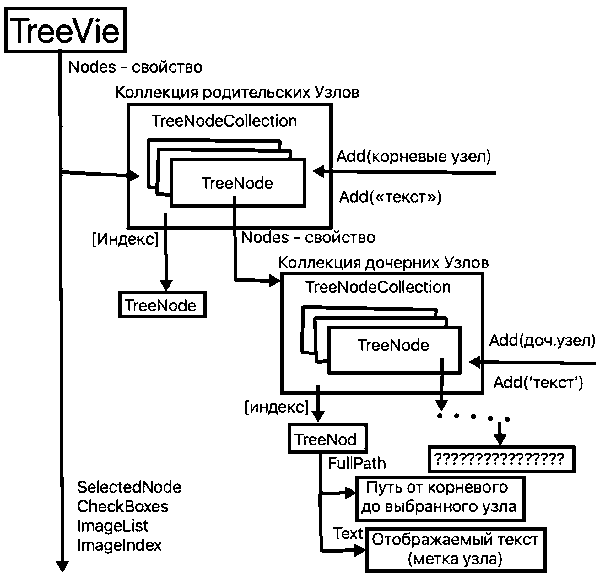

Рис. 4.2. Структурно-функциональная организация

Страница 196

---------

# 4.2. Работа с узлами ДОБАВЛЕНИЕ УЗЛОВ
__Режим визуальной разработки__. Дерево можно создать в режиме визуальной разработки, если заранее известны узлы дерева. Для этого в окне «Свойства» справа от свойства Nodes нажмите кнопку с многоточием (...). Откроется окно «Редактор узлов дерева». Сначала добавляют корневой узел, нажав кнопку «Добавить корень». После этого можно добавить дочерний узел, выделив корневой или любой другой узел и нажав кнопку «Добавить дочерний узел».

__Программный способ__. Часто древовидная структура строится на этапе выполнения программы по реальным данным, которых могут изменяться. Для доступа к требуемому узлу в коллекции можно использовать индексатор. Индекс может быть задан или числом, или строкой, являющейся ключом узла. Ключ узла может быть установлен свойством `Name` узла или задан в методе `Add`. Метод `Add` позволяет добавить в коллекцию узел. Массив узлов можно добавит методом `AddRange`. __Метод__ `Add` имеет несколько перегрузок. Мы будем использовать следующие:
- public virtual int Add(TreeNode node) - добавляет ранее созданный узел node дерева в конец коллекции узлов дерева.
- public virtual TreeNode Add(string text) - добавляет новый узел дерева с заданным текстом (меткой) `text` в конец текущей коллекции узлов дерева.
- public virtual TreeNode Add(string key, string text) — создает новый узел дерева с указанным ключом `кеу` и текстом (меткой) `text` и добавляет его в коллекцию.

Страница 197

-----------

__Пример__. Добавим новый узел в дочернюю коллекцию выделенного узла.

    TreeNode newNode = new TreeNode("Текст нового узла");
    treeView1.SelectedNode.Nodes.Add(newNode);
Класс `TreeNode` имеет несколько конструкторов. Здесь покаая конструктор с параметром, определяющим отображаемый в уже текст.

__Пример__. Создалим древовидную структуру марок автомобиля. Для доступа к узлу коллекции будем использовать индексацию. Лобыляем корневые узлы в дерево. WeeViewl.Nodes. Add("Мерседес C200"):

    treeView1.Nodes.Add("A6", "Ауди А6");
    // И Добавляем дочерние узлы в корневые,
    treeView1.Nodes[0].Nodes.Add("Kyne");
    treeView1.Nodes[0].Nodes.Add("Седан");
    treeView1.Nodes["A6"].Nodes.Add("Kyne");
    treeView 1.Nodes["A6"].Nodes.Add("Седан");
В приведенном примере демонстрируется использование тестового индекса «Аб», который определяет ключ узла. На рис. 43 показано созданное дерево.

Страница 198

---------

    œ Form1 _OX
- Mercedes C200
    - Купе
    - Седан
- Ауди A6
    - Купе
    - Седан
Рис. 4.3. Древовидная структура автомобилей

__Замечание__. Дочерний узел можно добавить в какой-либо родительский только один раз. Если узел с таким же текстом должен быть добавлен так же и в другой родительский узел (или в этот же второй раз), то необходимо создавать новый обьект TreeNode : тем же текстом. Чаще всего попытка добавить узел в разные места возбуждает исключение, ! иногда этого не происходит, и тогда предыдушк повторения удаляются.

Страница 199

-------------

__Пример__. Некорректное добавление узла. В приведенном ниже примере предпринимается попытка добавить узел «Купе» в разные ветви, что приводит к ошибке.

    TreeNode узел00 = new TreeNode("Мерседес С200");
    TreeNode узел01 = new TreeNode("Ауди А6");
    TreeNode узел10 = new TreeNode("Kyne");
    // Добавляем дочерний узел.
    узел00.Nodes. Add(узел10);
    узел01.Nodes.Add(узел10);
    // ОШИБКА!
Если узел создан ранее, то его можно продублировать методом `Clone` для повторного использования:

TreeNode узел10Clone1 = (TreeNode)узел10.Clone();

# УДАЛЕНИЕ УЗЛОВ
В режиме визуальной разработки для удаления узла выделите его в окне «Редактор TreeNode» и нажмите кнопку «Удалить». Для удаления одиночного узла программным способом воспользуйтесь методом Remove коллекции. Для очистки всех узлов коллекции используйте метод `Clear`.

__Пример__. Удалить выделенный узел, включая его дочерние улы.

    treeView1.Nodes.Remove(treeView1.SelectedNode);
__Пример__. Очистить все узлы дерева

    TreeView1.Nodes.Clear();
Страница 200

-------